<a href="https://colab.research.google.com/github/GabrielPing/DSRP_Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/GabrielPing/DSRP_Project/refs/heads/main/health_dataset.csv"
df = pd.read_csv(url)
df.head()

,ADM_RNO1,Province,Health_region_ grouped,Gender,Marital_status,Household,Age,Worked_job_business,Edu_level,Gen_health_state,...,Physical_vigorous_act_time,Work_hours,working_status,Aboriginal_identity,Birth_country,Immigrant,Insurance_cover,Food_security,Income_source,Total_income
0,1000,47,47906,2,1.0,2.0,3,1.0,3.0,3,...,10.0,38.0,1,2.0,1,2.0,1.0,0.0,1.0,5.0
1,100005,47,47906,1,1.0,2.0,5,NaN,2.0,3,...,0.0,NaN,6,2.0,1,2.0,1.0,0.0,2.0,4.0
2,100012,59,59914,2,2.0,1.0,5,NaN,1.0,2,...,NaN,NaN,6,2.0,1,2.0,NaN,NaN,2.0,2.0
3,100015,13,13904,1,2.0,1.0,5,NaN,1.0,3,...,NaN,NaN,6,2.0,1,2.0,NaN,0.0,2.0,3.0
4,100018,46,46903,1,2.0,1.0,4,2.0,3.0,5,...,NaN,NaN,6,2.0,1,2.0,2.0,0.0,2.0,1.0


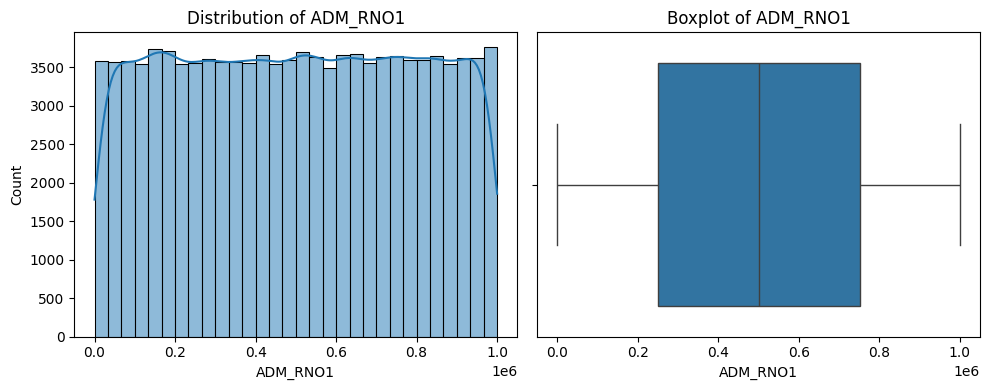

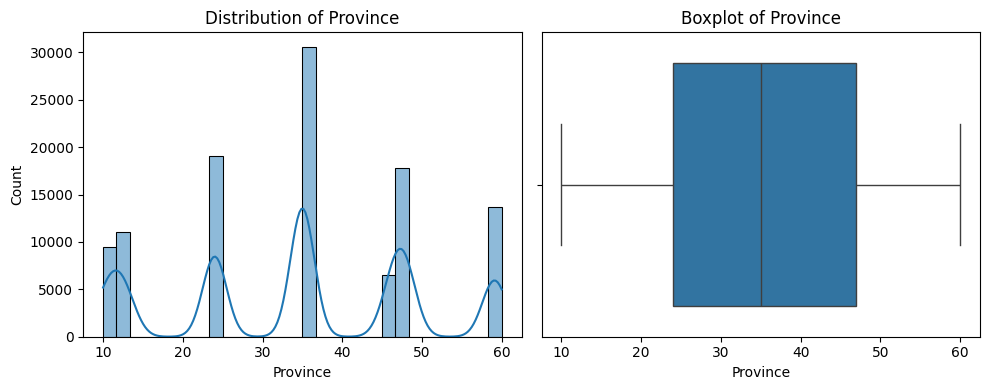

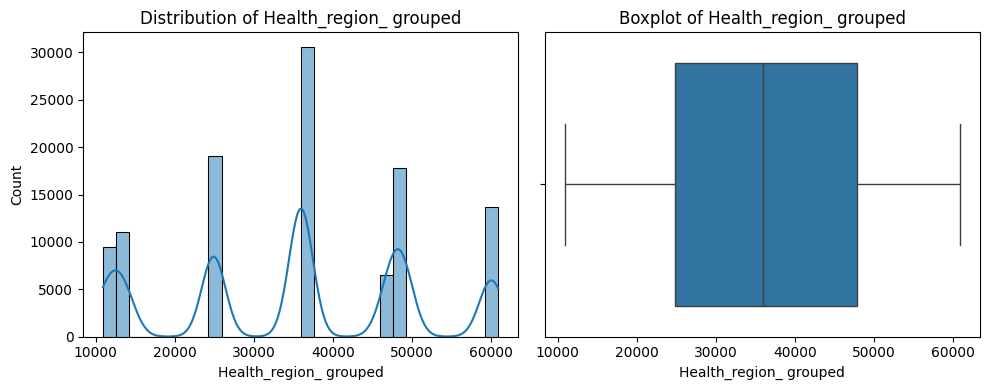

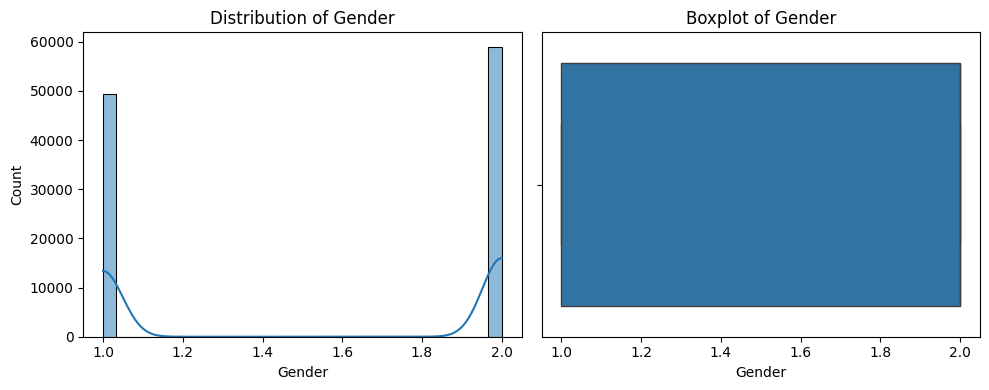

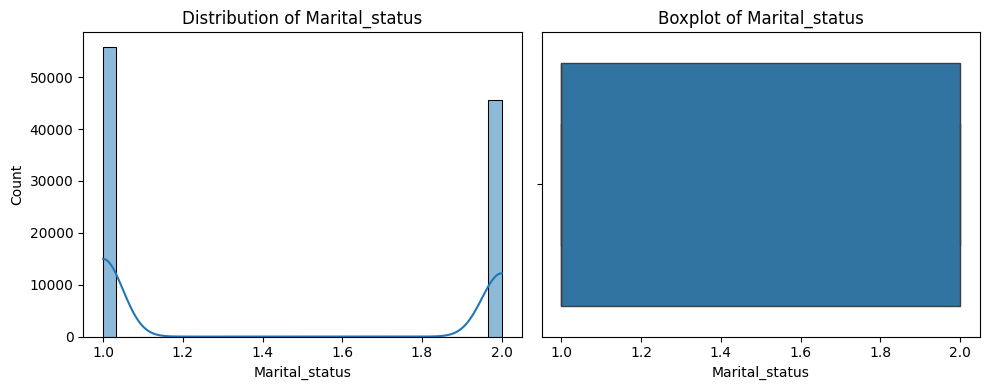

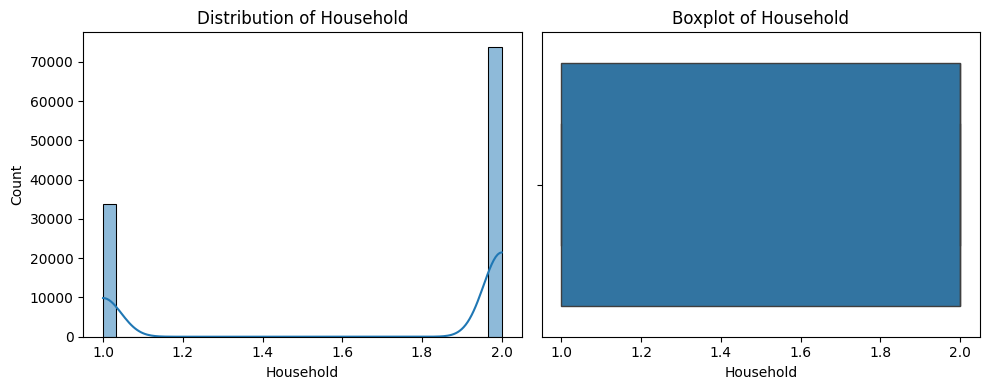

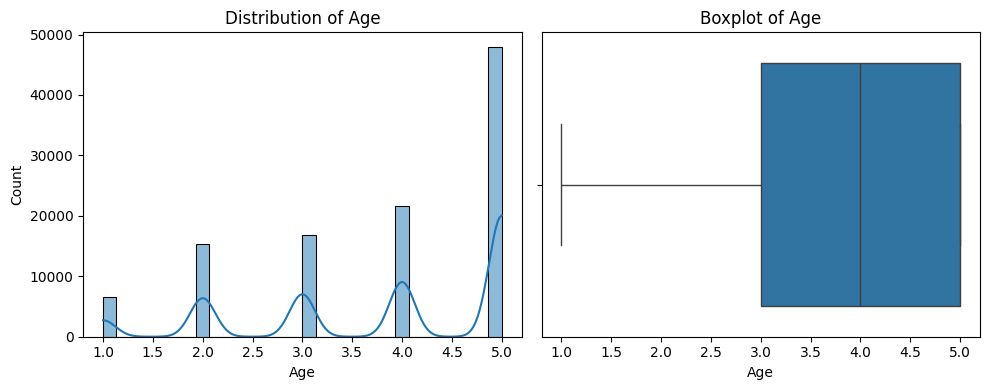

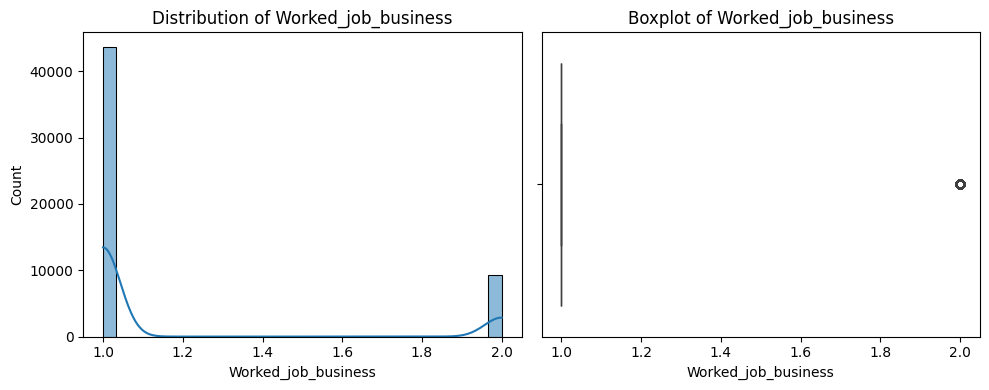

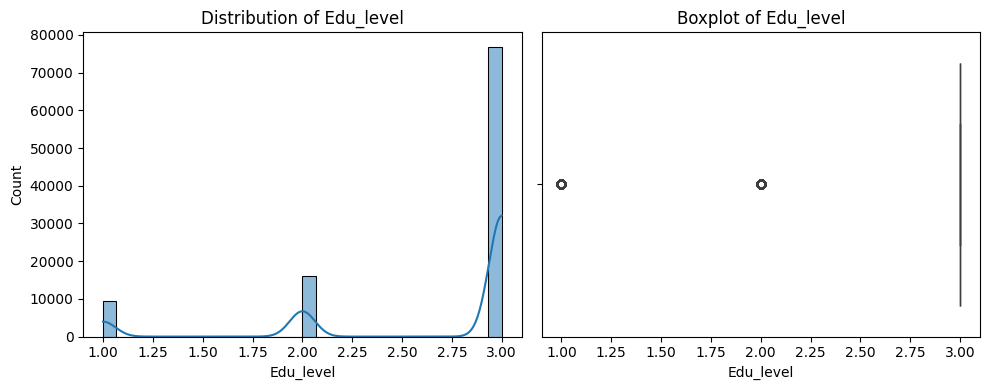

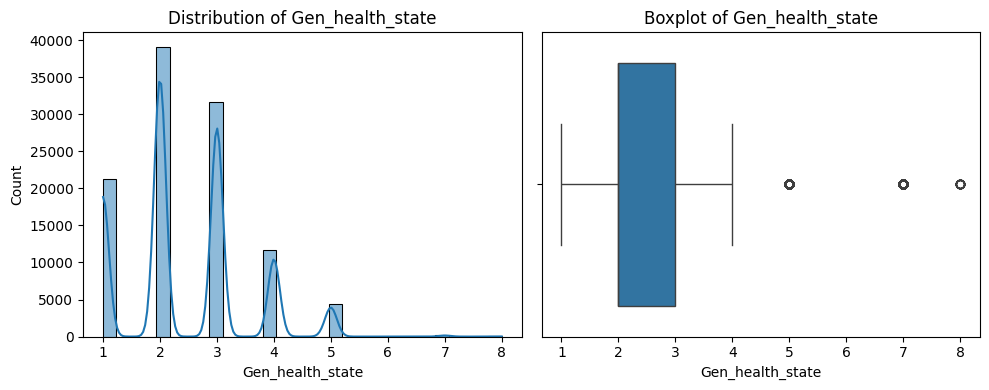

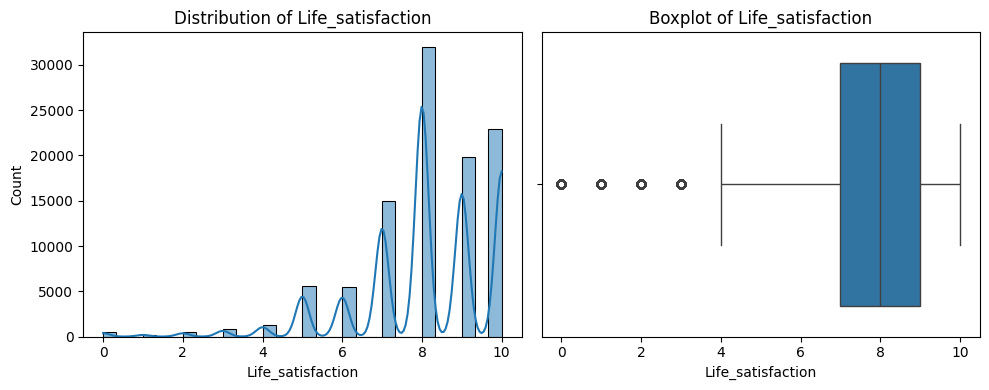

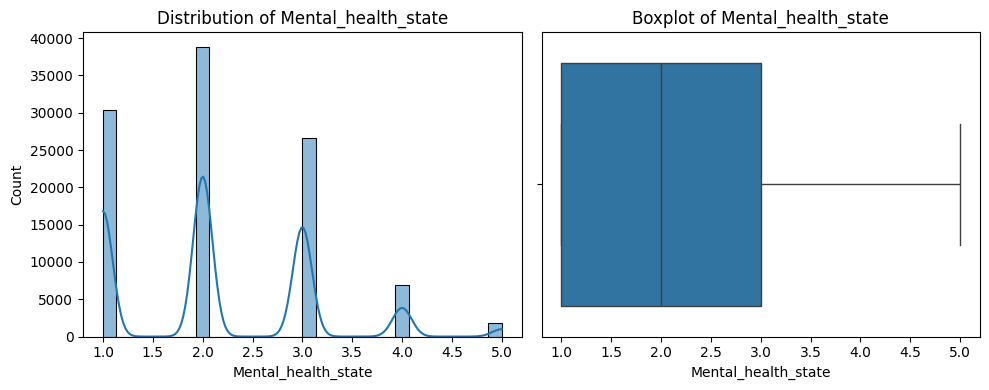

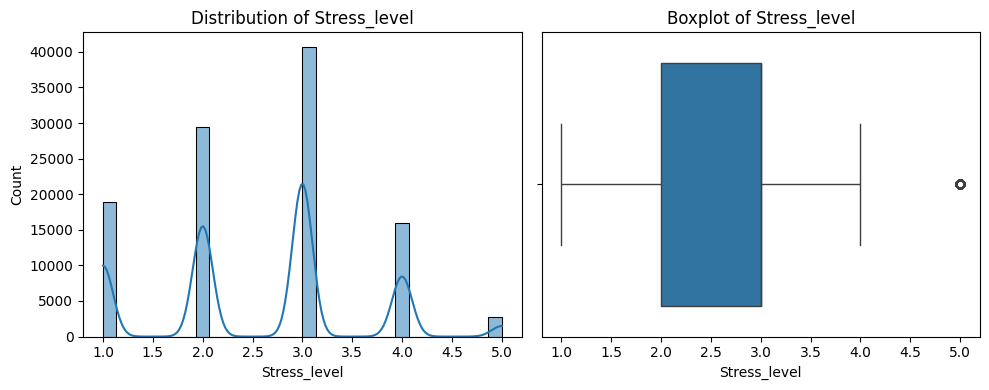

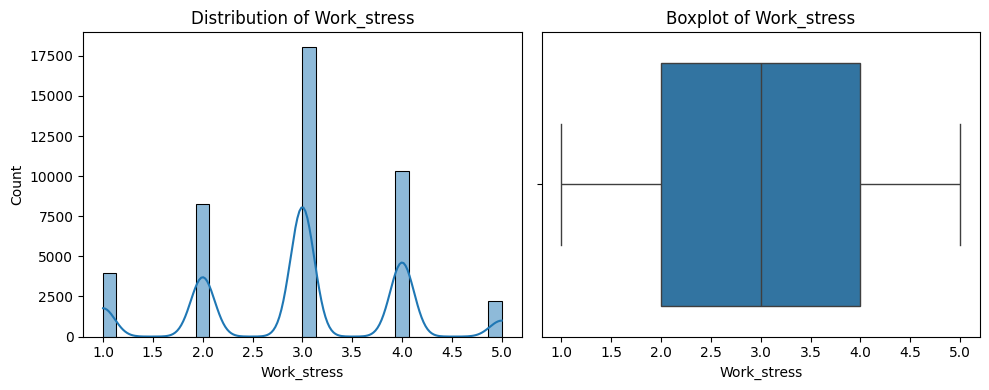

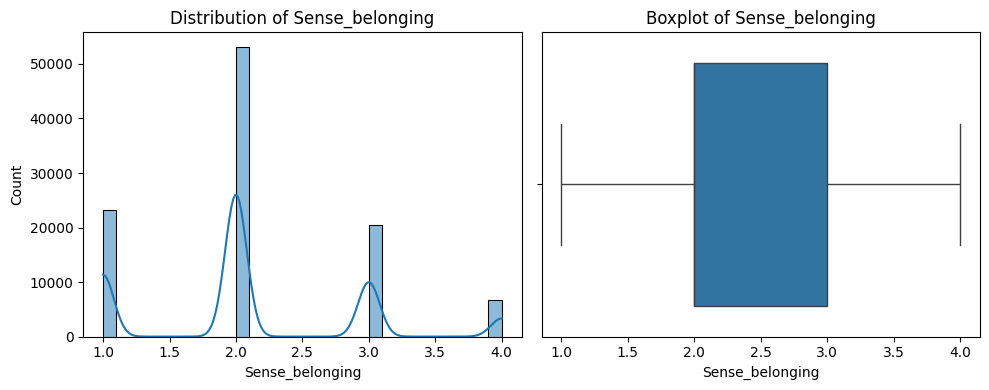

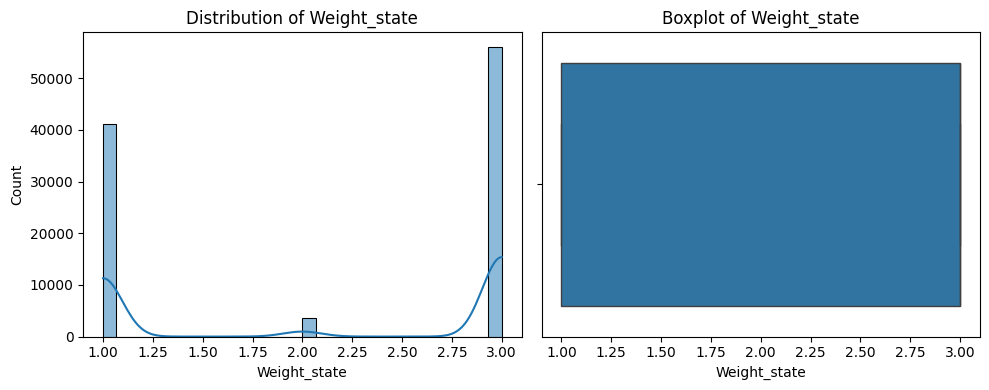

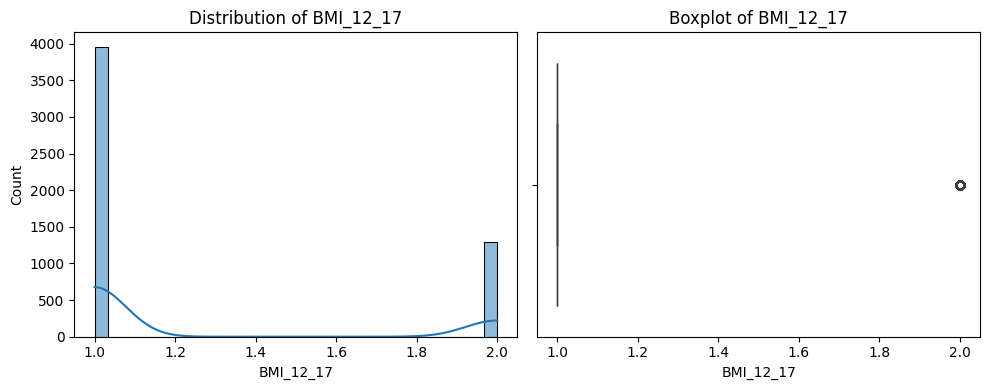

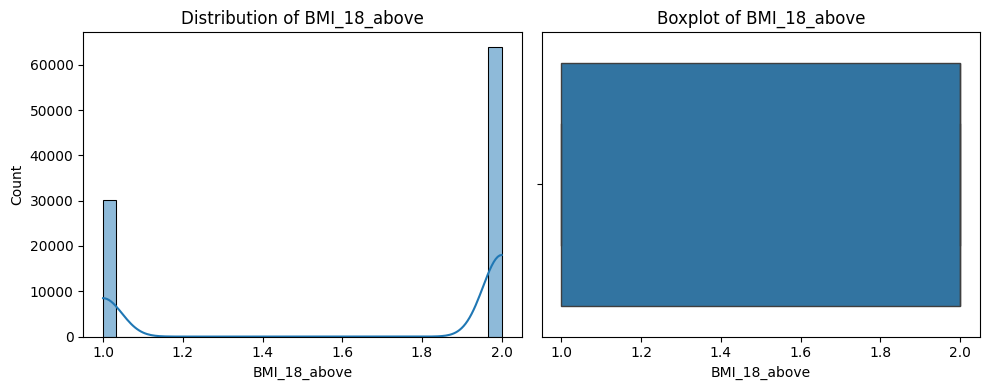

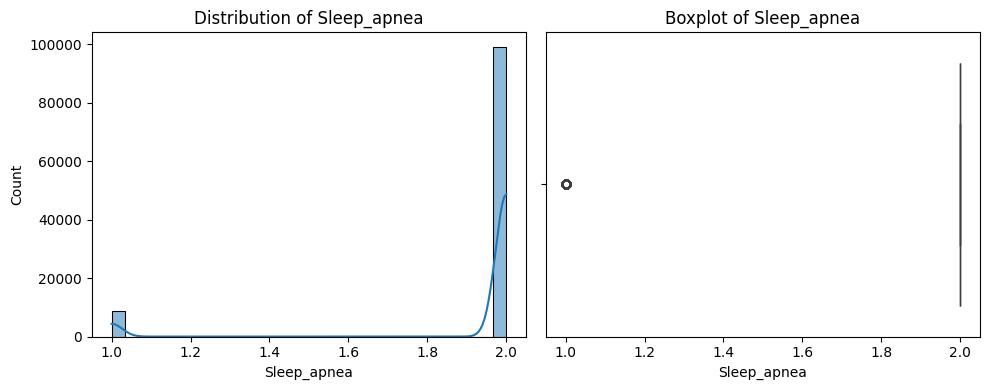

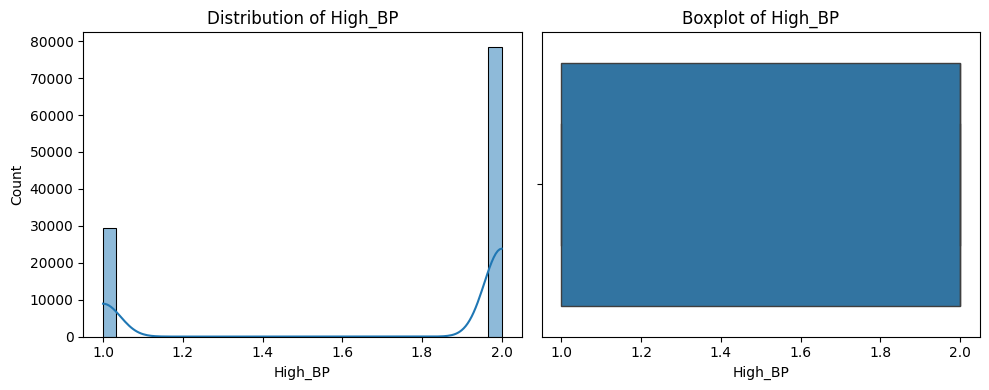

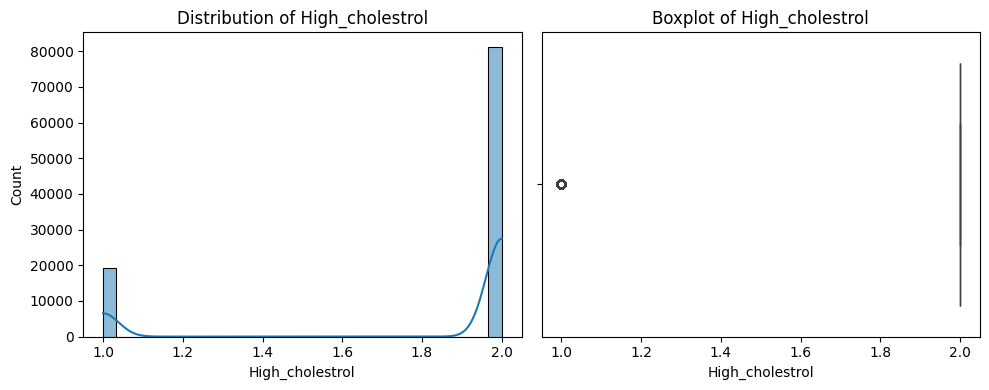

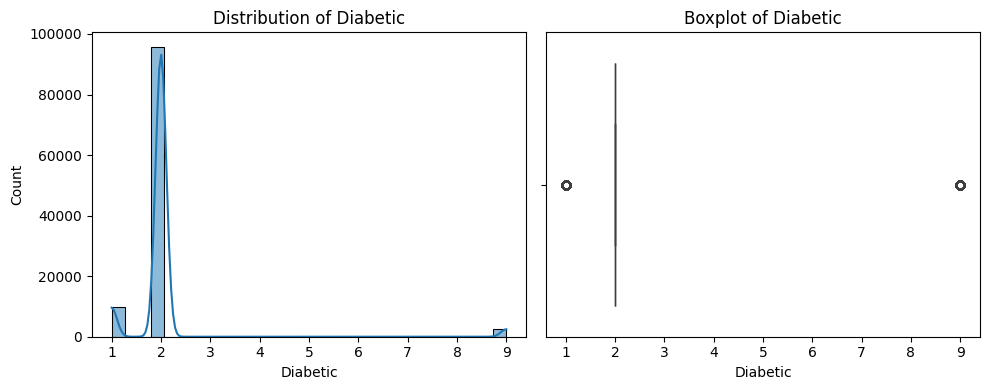

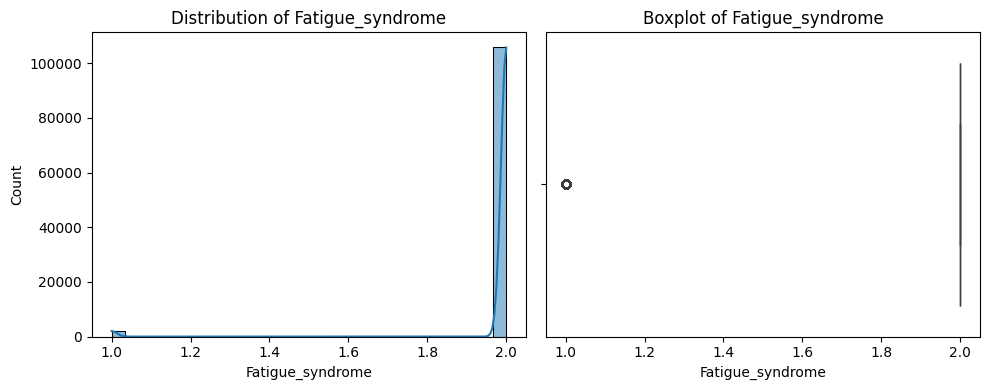

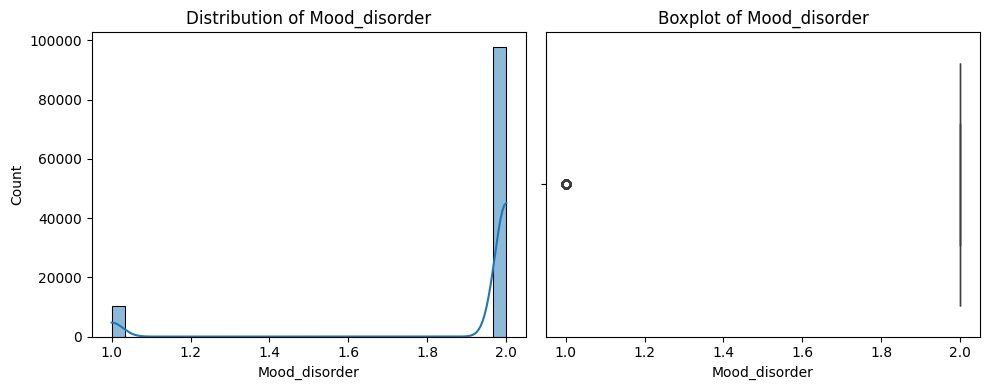

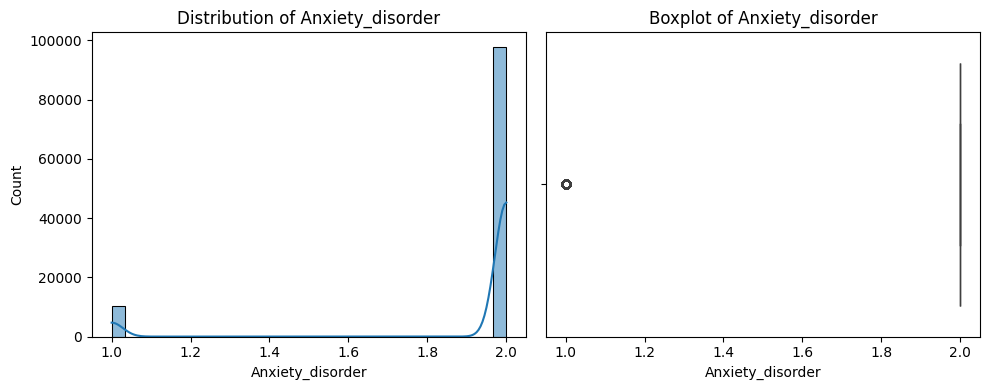

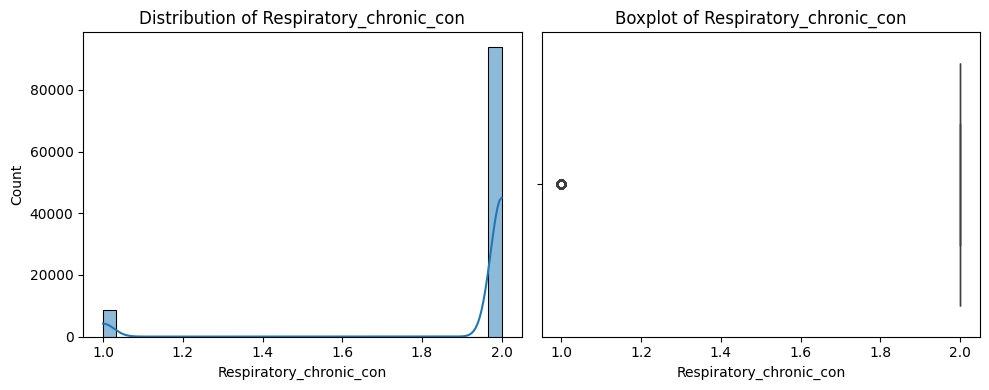

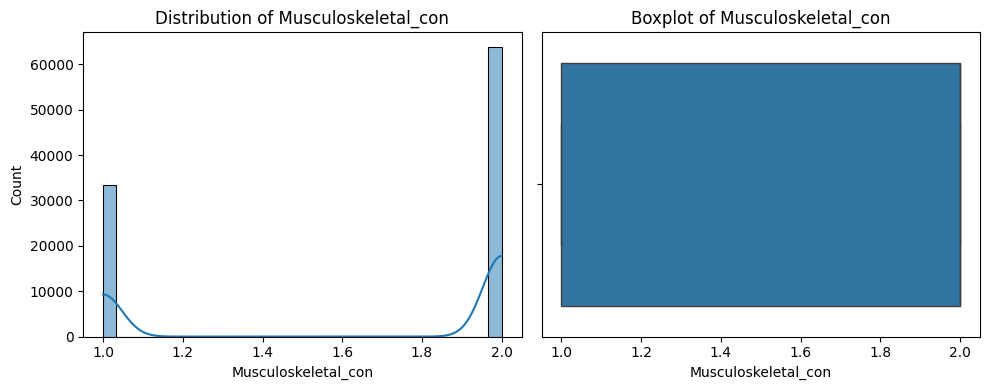

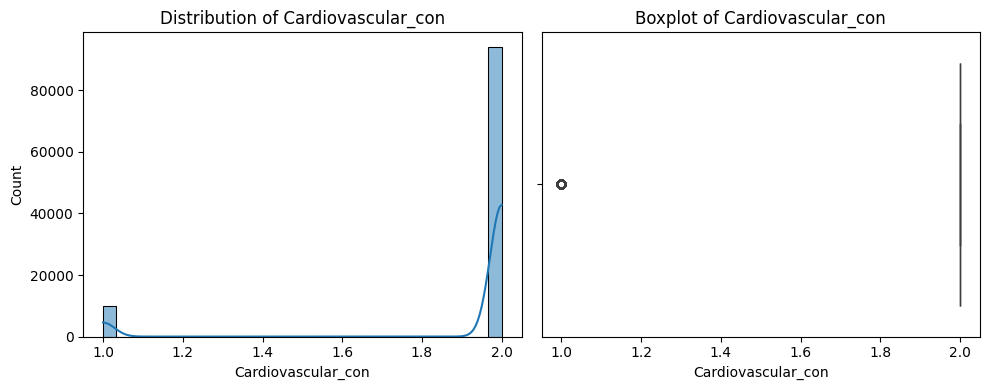

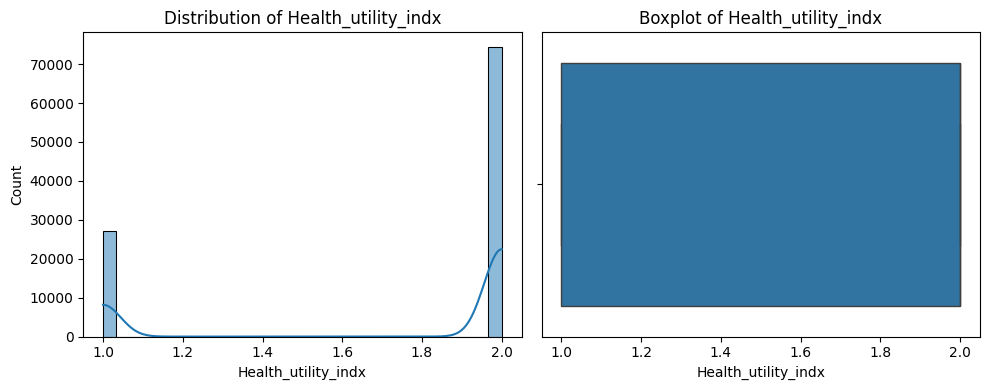

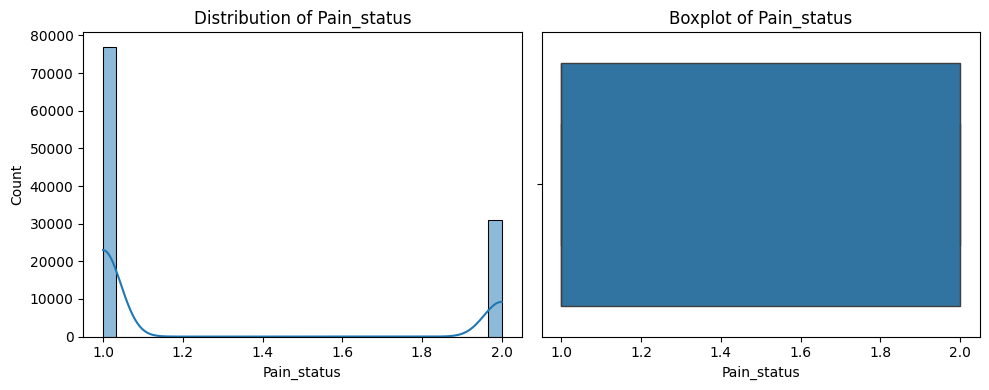

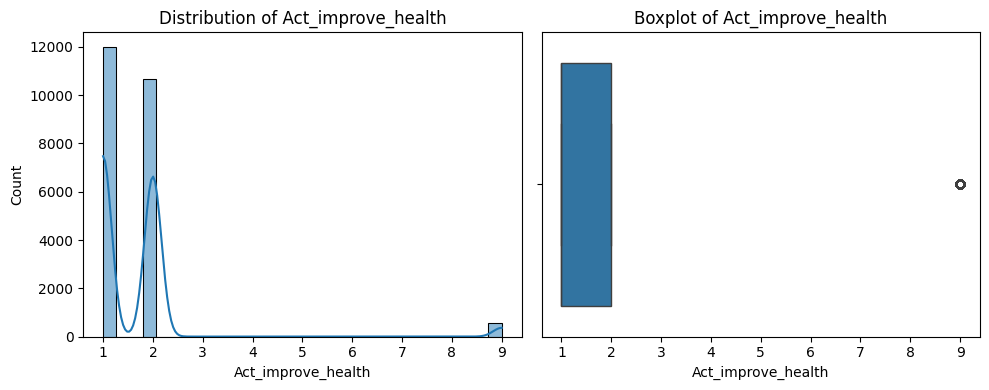

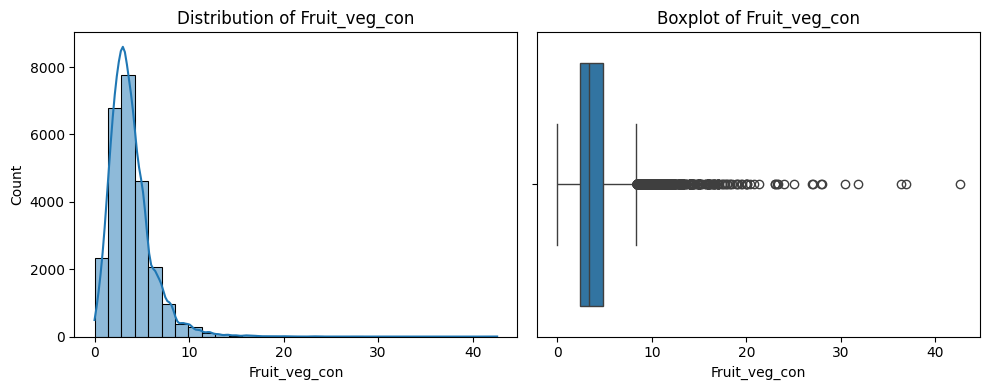

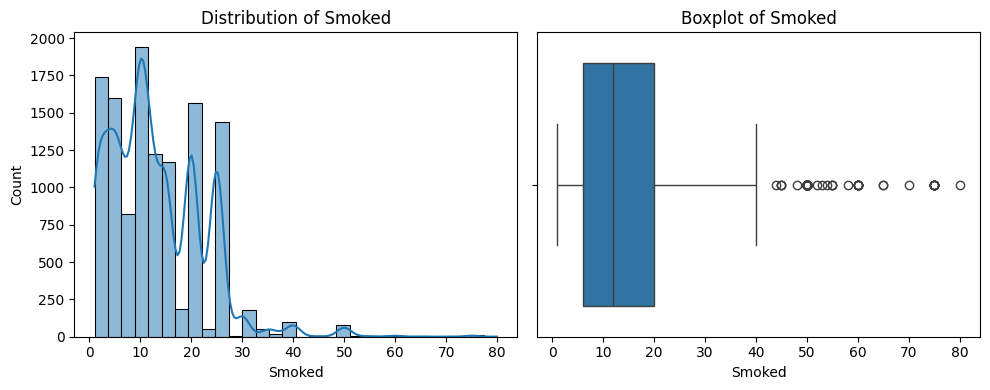

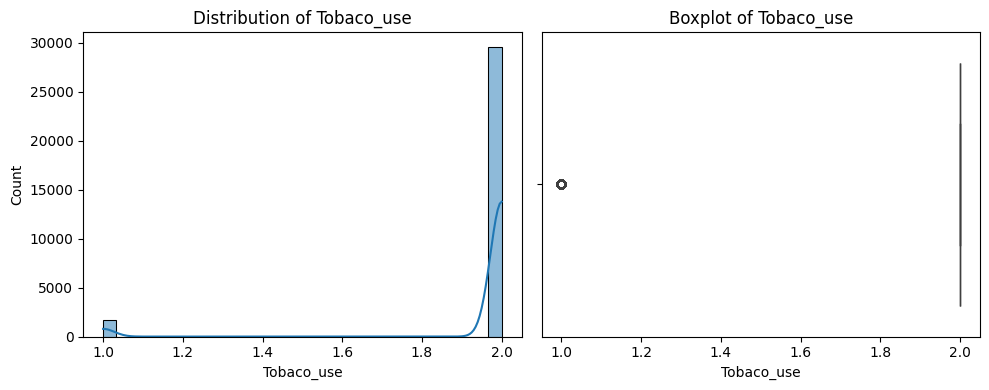

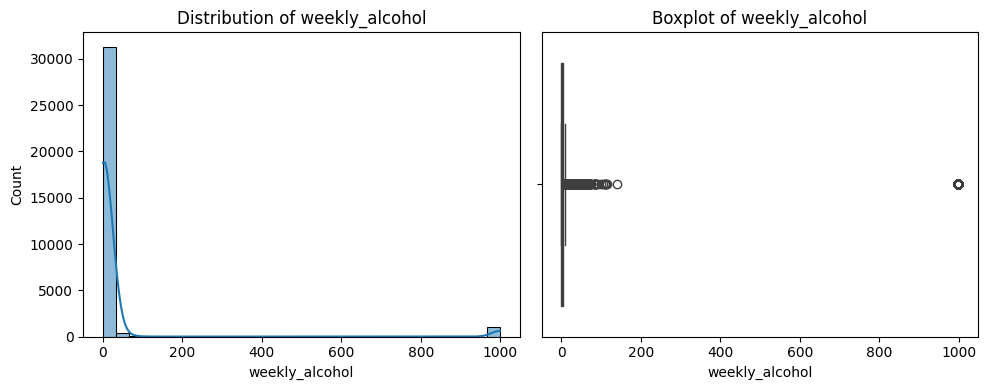

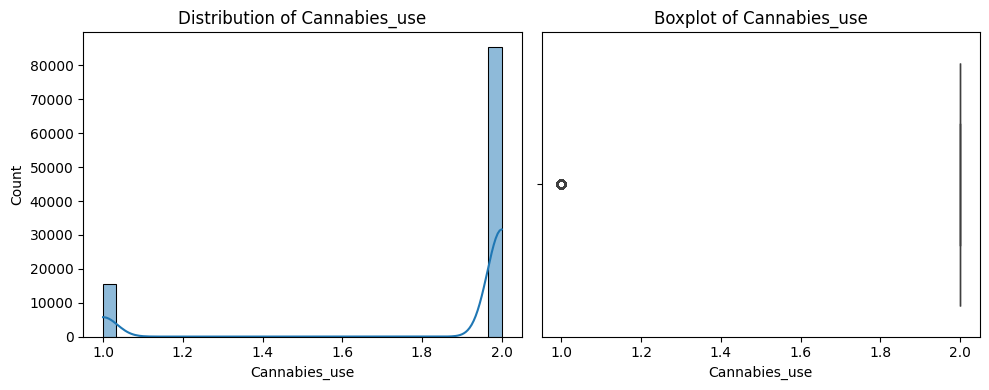

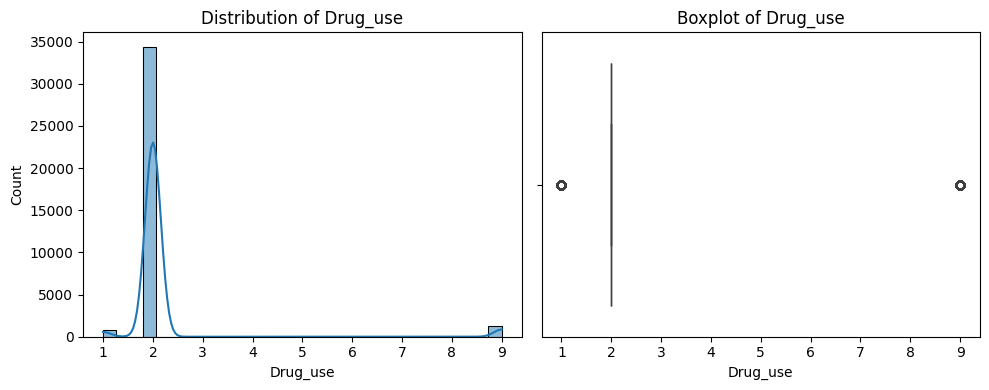

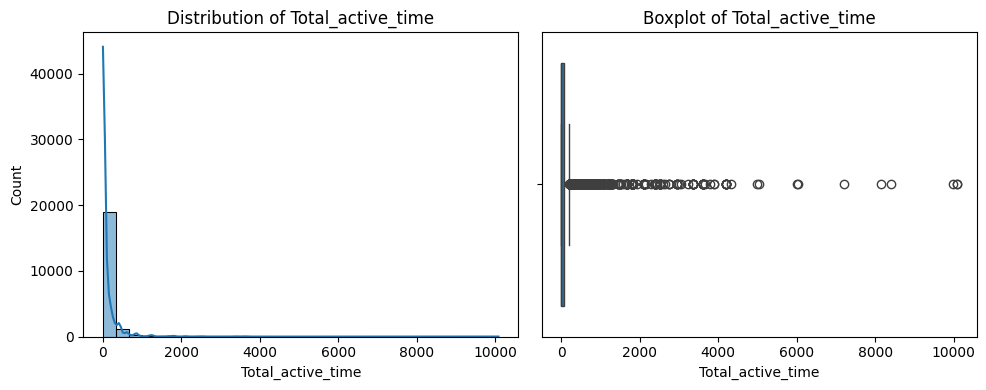

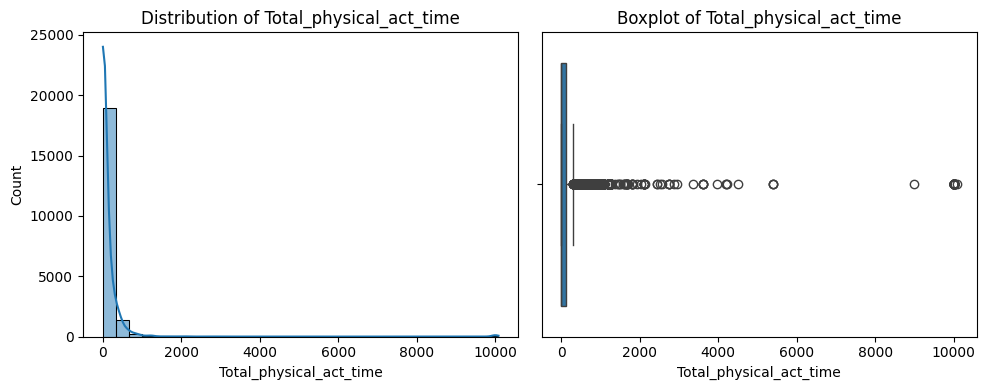

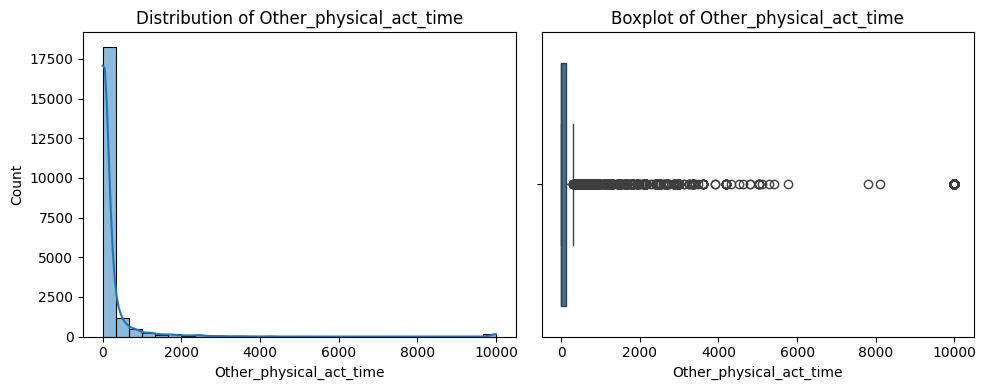

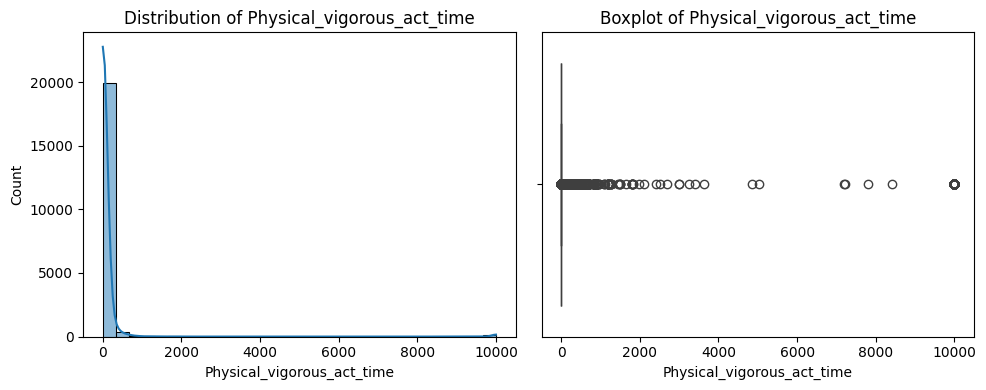

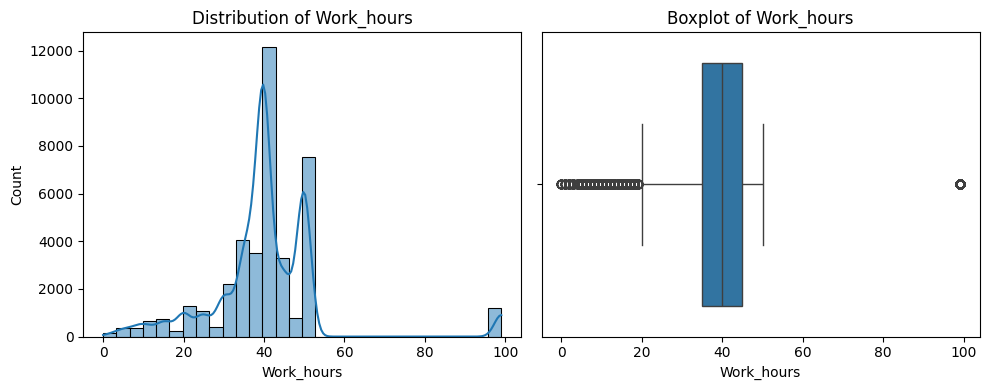

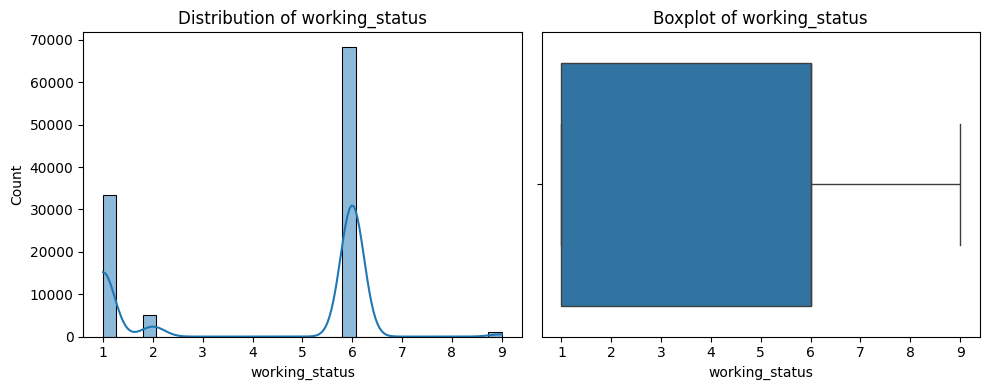

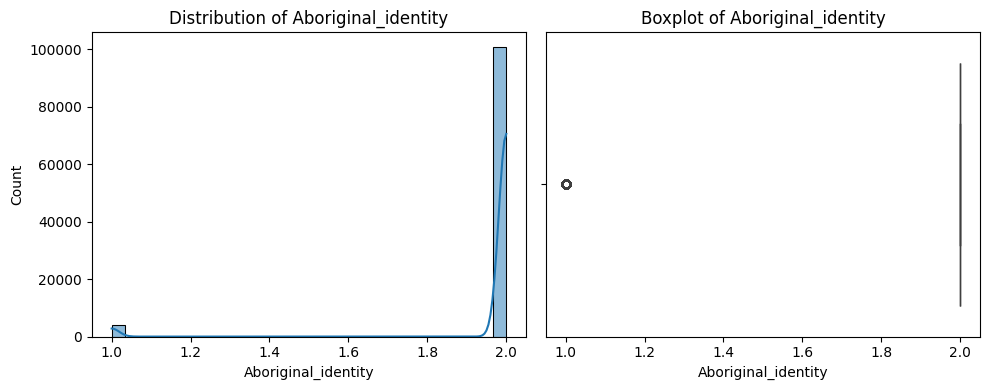

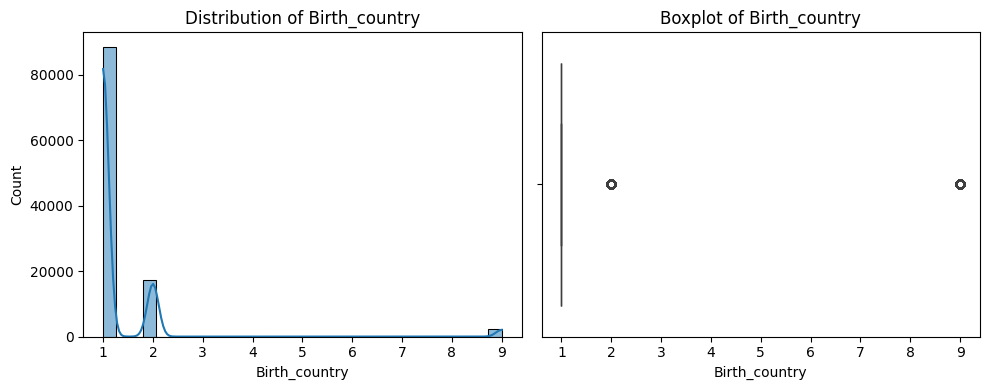

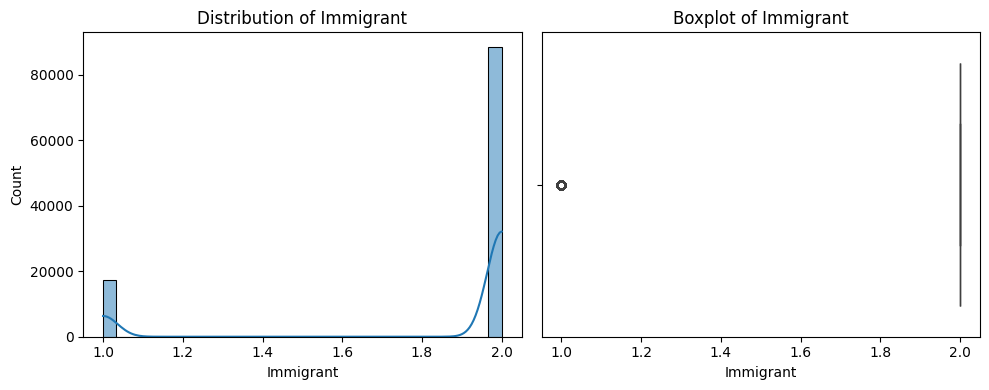

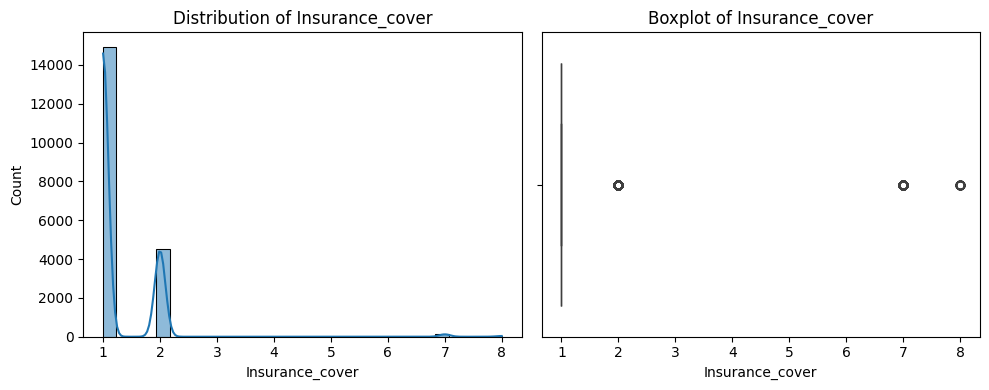

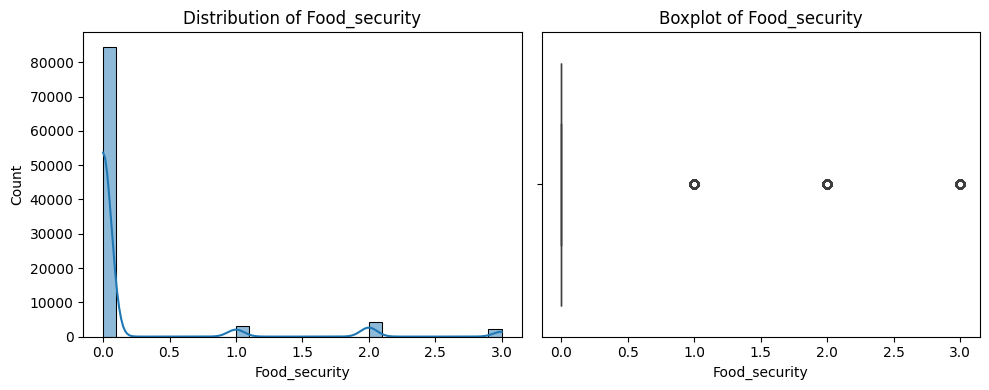

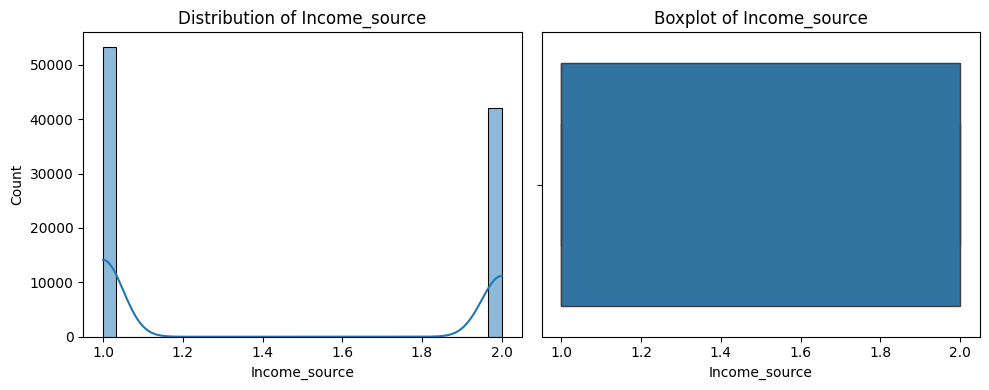

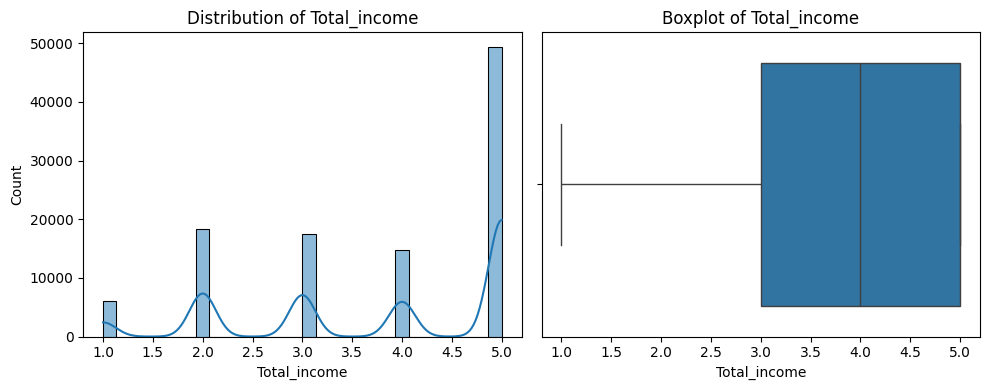

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


In [28]:
import pandas as pd

missing_codes_map = {

    'Gender': [9],
    'Marital_status': [3,9],
    'Household': [9],
    'Age': [],
    'Worked_job_business': [6,7,8,9],
    'Edu_level': [9],
    'Gen_health_state': [6,7,8,9],
    'Life_satisfaction': [97,98,99],
    'Mental_health_state': [7,8,9],
    'Stress_level': [7,8],
    'Work_stress': [6,7,8,9],
    'Sense_belonging': [7,8,9],
    'Weight_state': [6,7,8,9],
    'BMI_12_17': [6,9],
    'BMI_18_above': [6,9],
    'Sleep_apnea': [7,8],
    'High_BP': [7,8],
    'High_cholestrol': [6,7,8],
    'Diabetic': [6,7,8,9],
    'Fatigue_syndrome': [7,8],
    'Mood_disorder': [7,8],
    'Anxiety_disorder': [7,8],
    'Respiratory_chronic_con': [9],
    'Musculoskeletal_con': [6,9],
    'Cardiovascular_con': [9],
    'Health_utility_indx': [9],
    'Pain_status': [9],
    'Act_improve_health': [6,7,8,9],
    'Fruit_veg_con': [],
    'Tobaco_use': [6,7,8,9],
    'weekly_alcohol': [999],
    'Cannabies_use': [6,7,8,9],
    'Drug_use': [3,4,9],
    'working_status': [6,9],
    'Aboriginal_identity': [7,8,9],
    'Birth_country': [9],
    'Immigrant': [9],
    'Insurance_cover': [7,8,9],
    'Food_security': [6,9],
    'Income_source': [9],
    'Total_income': [9],
}

for col in categorical_cols:
    if col in df.columns:
        missing_codes = missing_codes_map.get(col, [])
        if missing_codes:
            df[col] = df[col].replace(missing_codes, pd.NA)
        print(f"Value counts for {col}:")
        print(df[col].value_counts(dropna=True).sort_index())
        print("-" * 50)


Value counts for Gender:
Gender
1    49284
2    58968
Name: count, dtype: int64
--------------------------------------------------
Value counts for Marital_status:
Marital_status
1.0    55861
2.0    45517
Name: count, dtype: int64
--------------------------------------------------
Value counts for Household:
Household
1.0    33882
2.0    73848
Name: count, dtype: int64
--------------------------------------------------
Value counts for Age:
Age
1     6499
2    15277
3    16825
4    21684
5    47967
Name: count, dtype: int64
--------------------------------------------------
Value counts for Worked_job_business:
Worked_job_business
1.0    43694
2.0     9304
Name: count, dtype: int64
--------------------------------------------------
Value counts for Edu_level:
Edu_level
1.0     9469
2.0    16069
3.0    76845
Name: count, dtype: int64
--------------------------------------------------
Value counts for Gen_health_state:
Gen_health_state
1    21198
2    39093
3    31643
4    11732
5     44

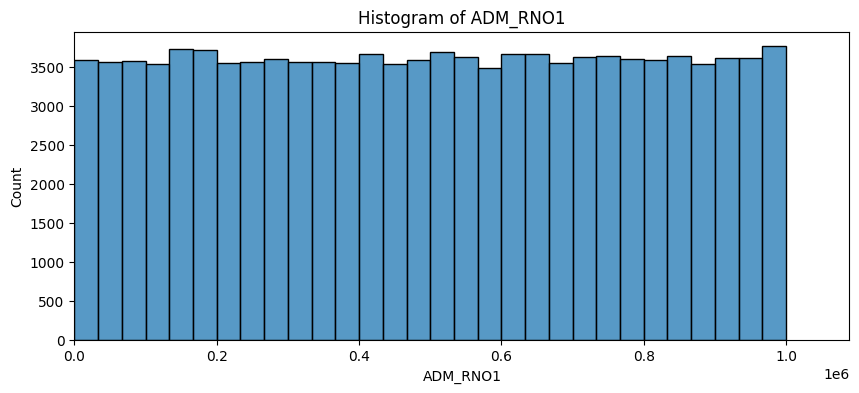

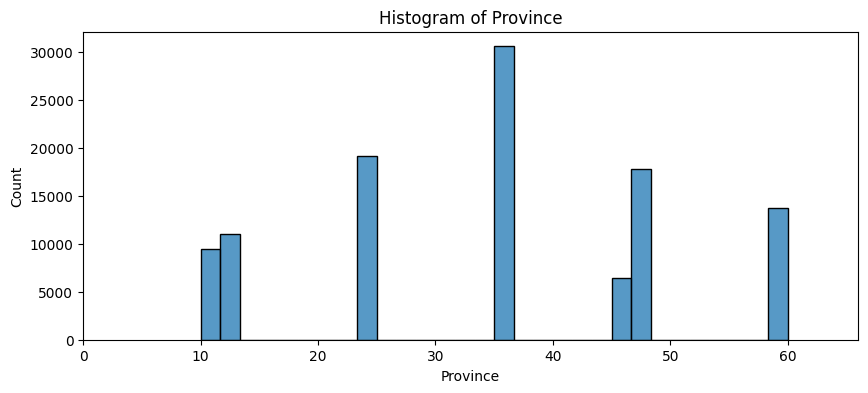

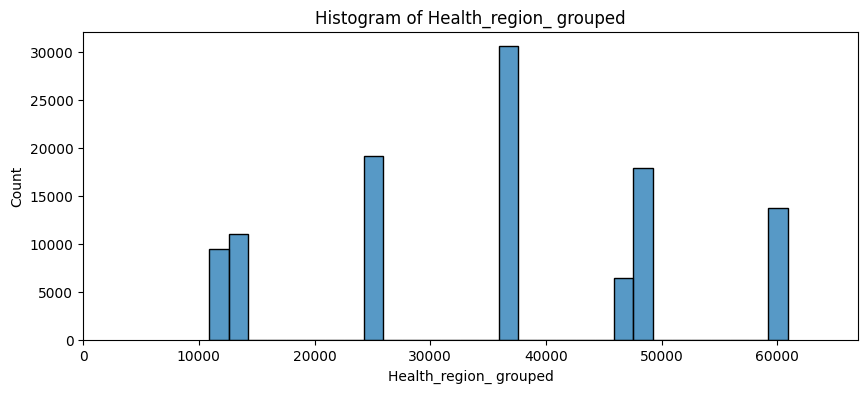

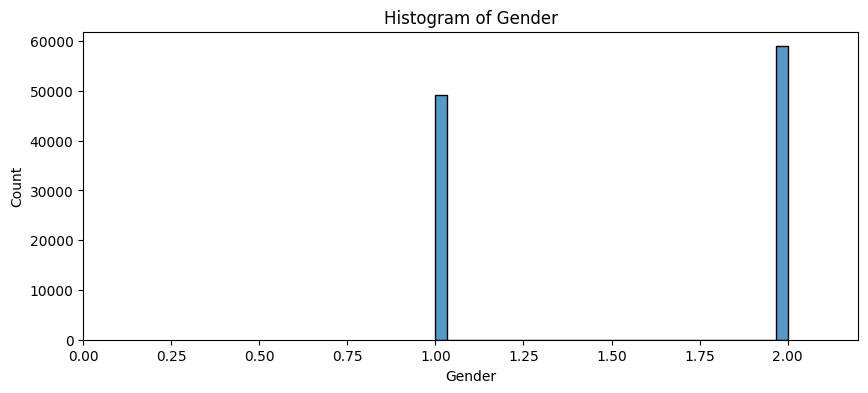

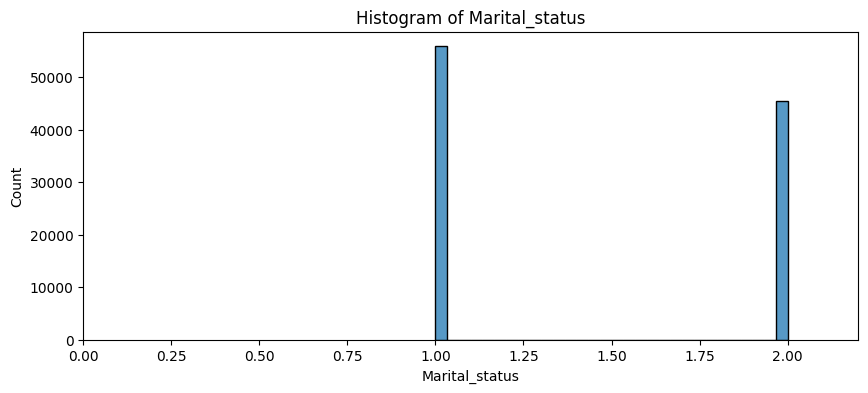

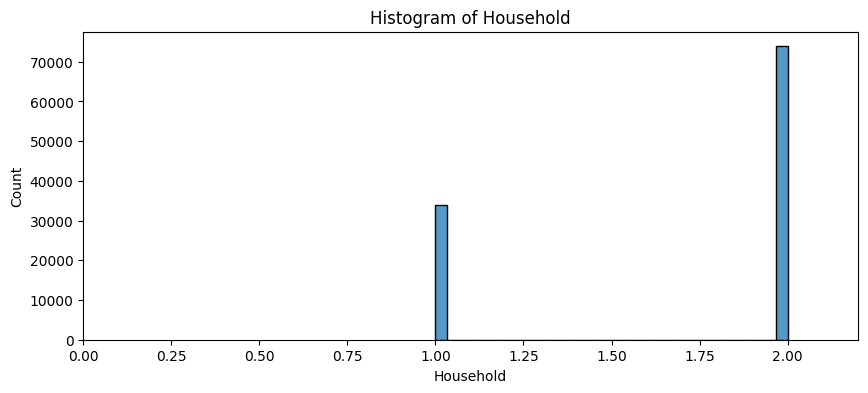

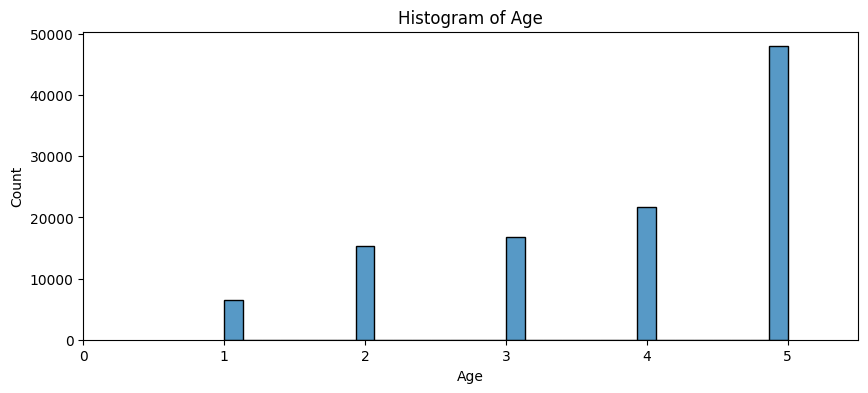

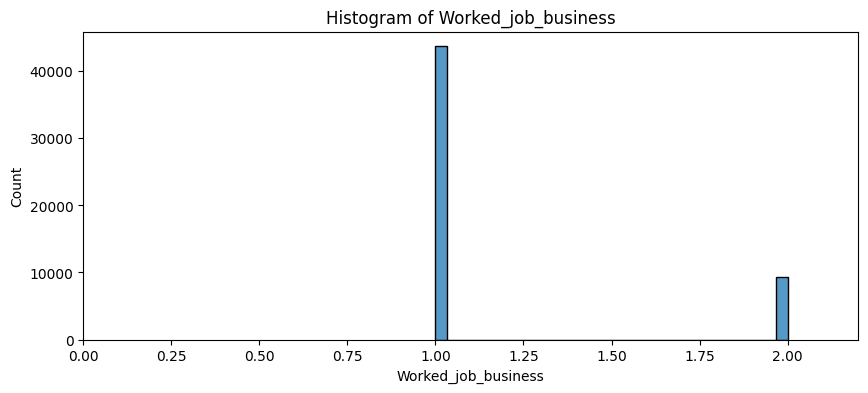

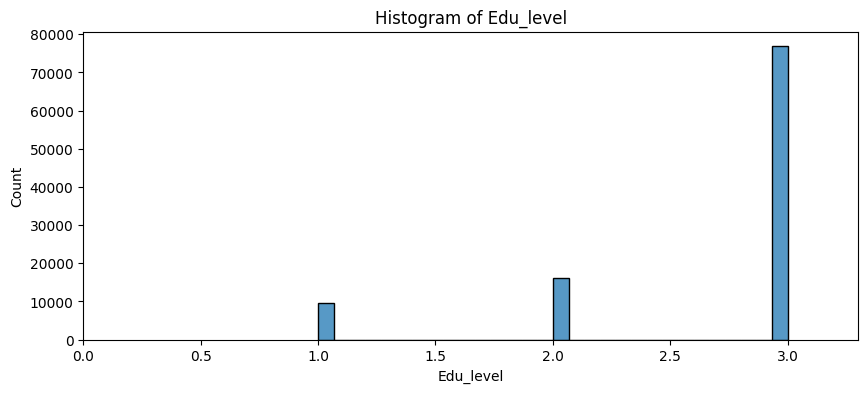

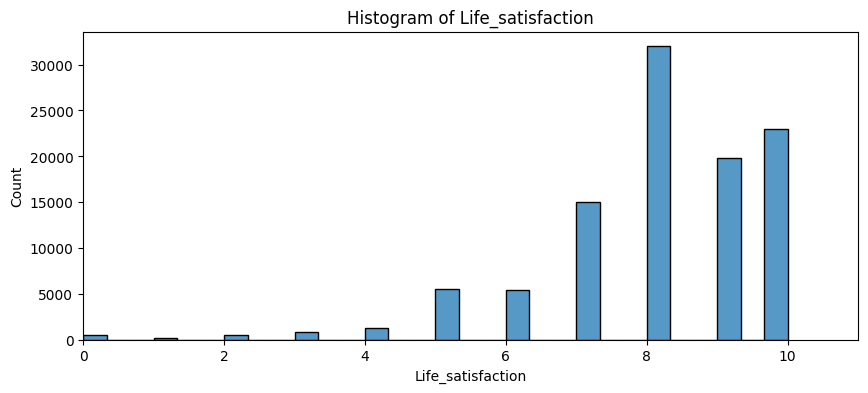

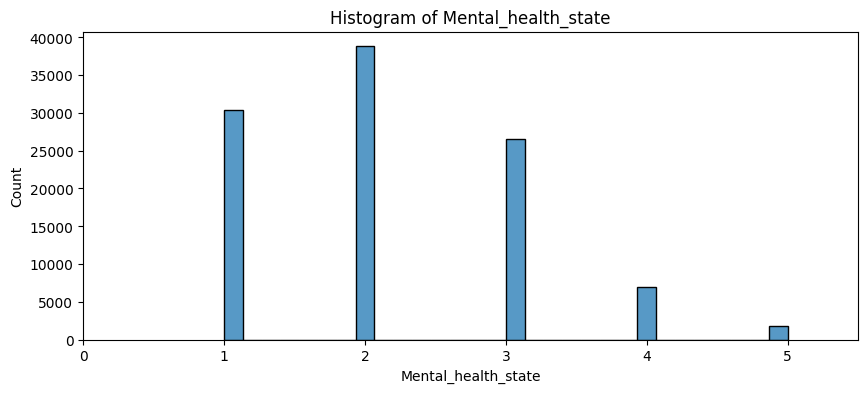

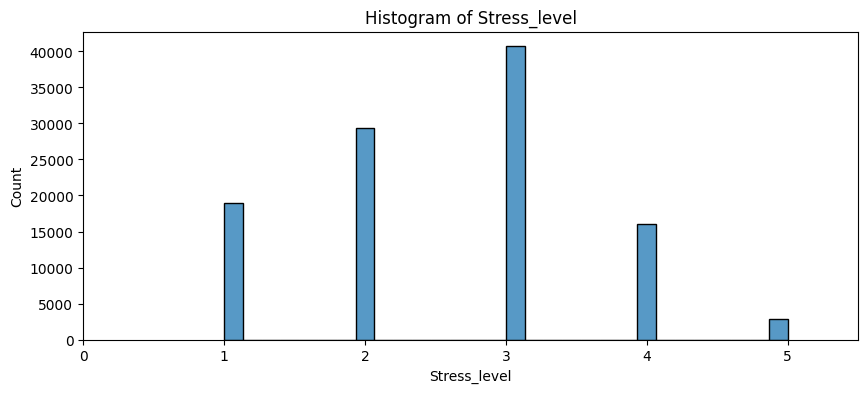

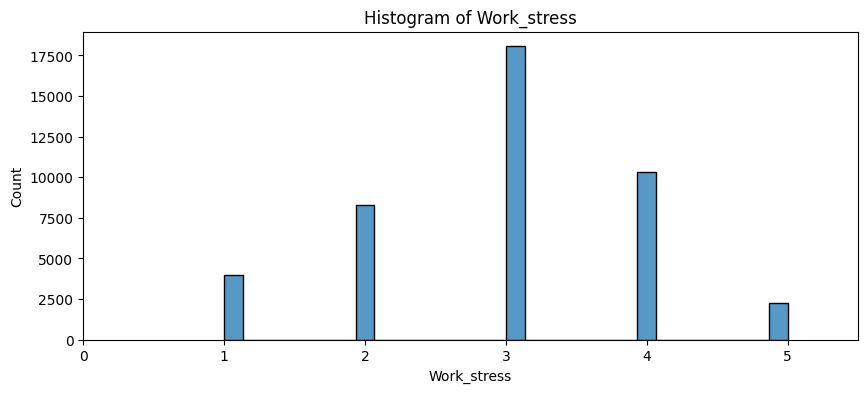

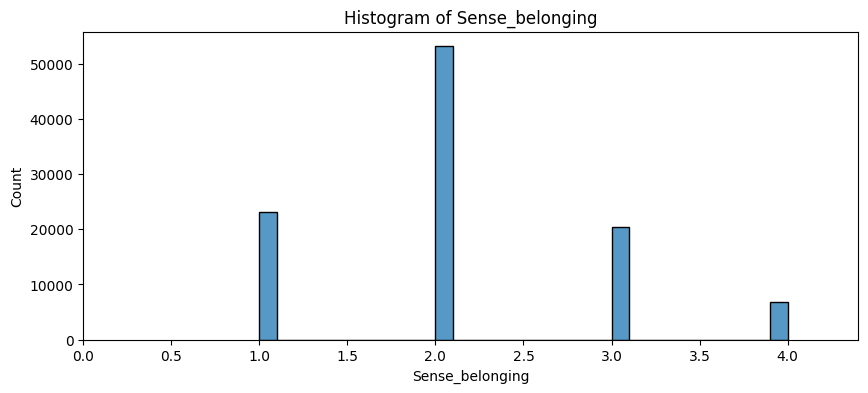

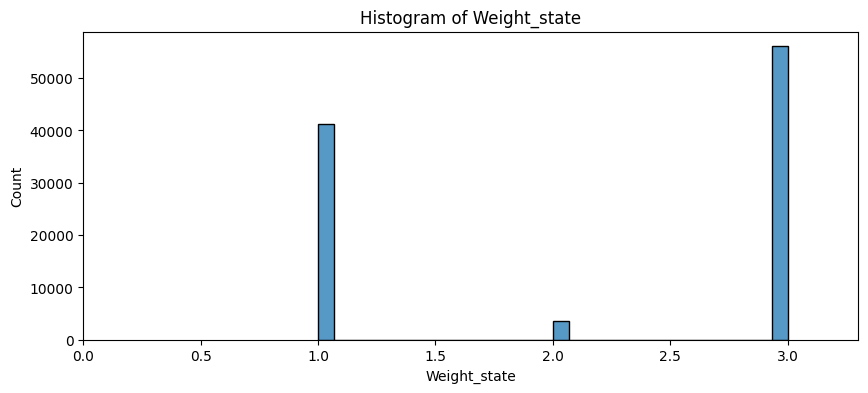

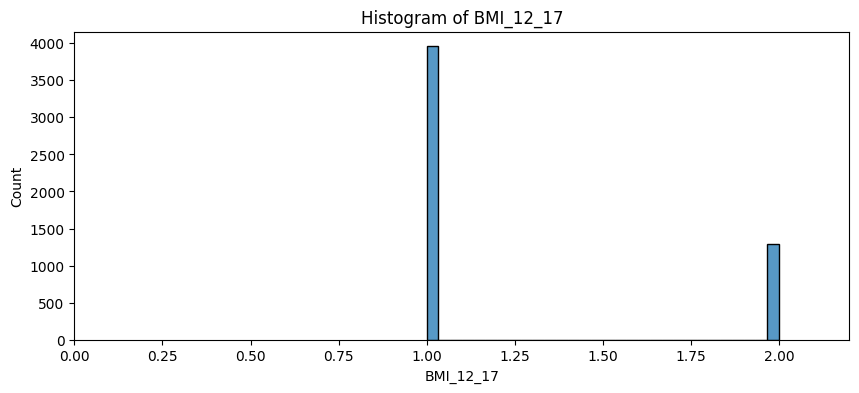

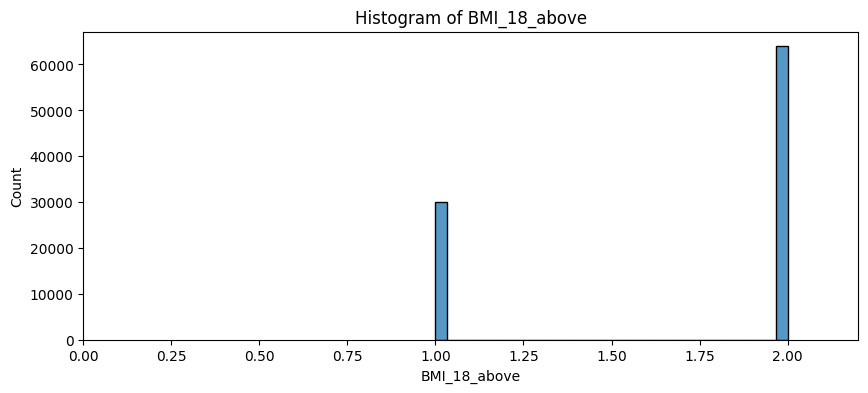

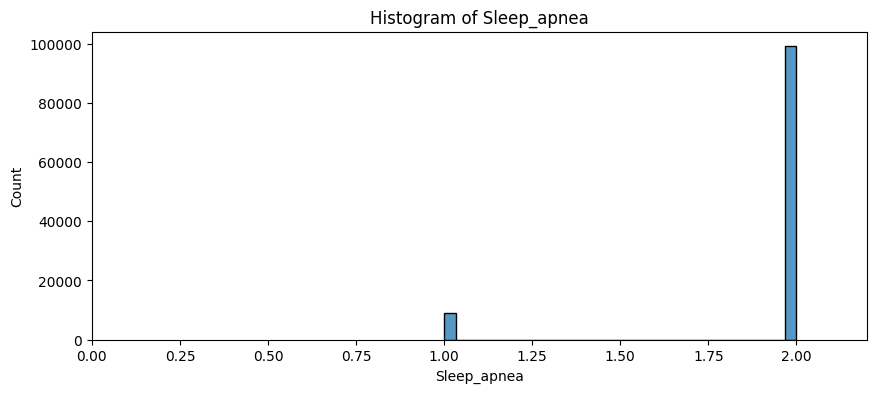

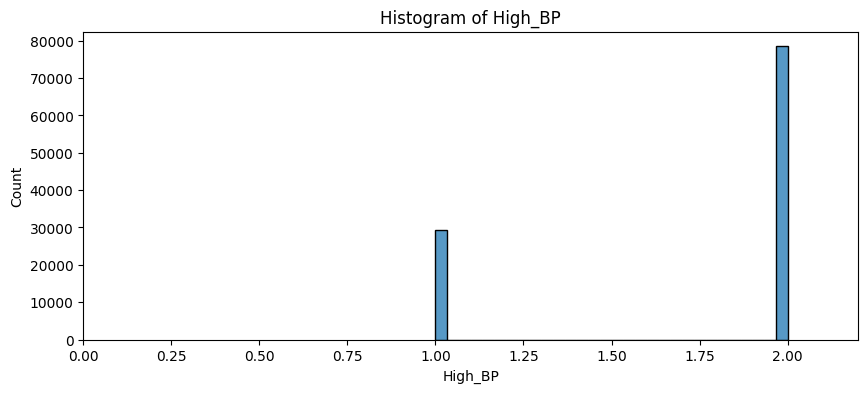

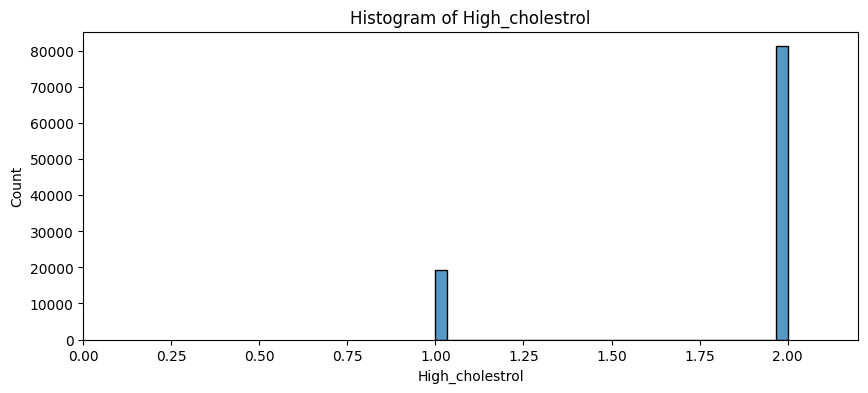

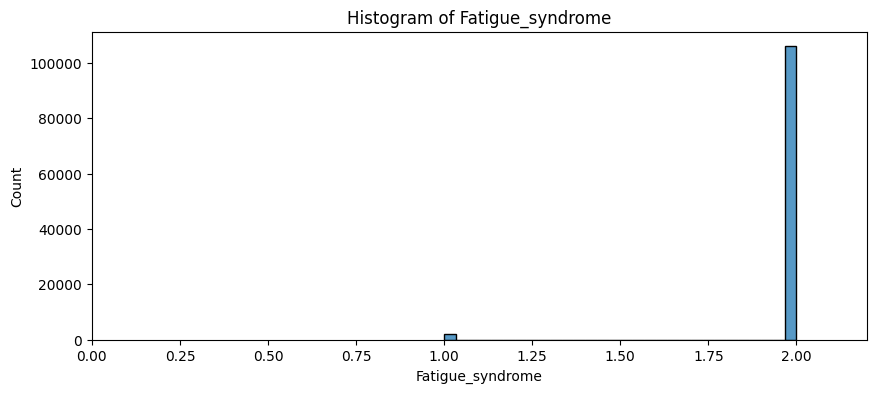

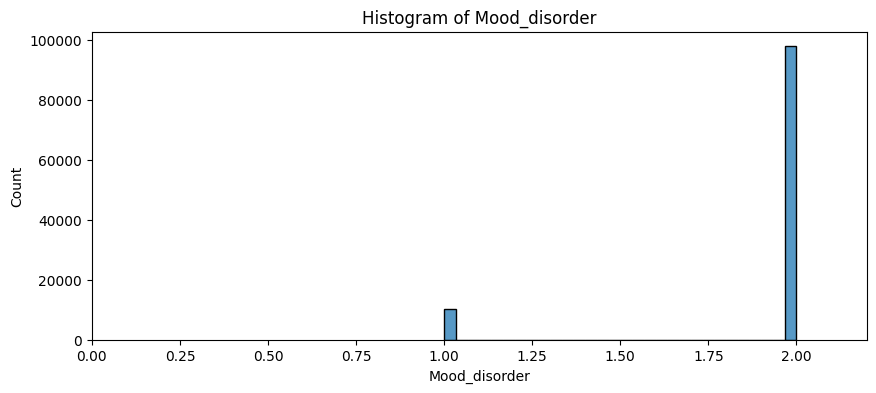

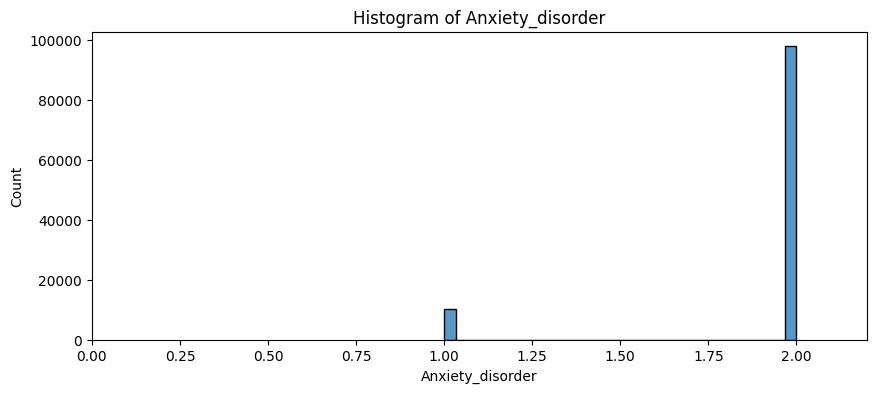

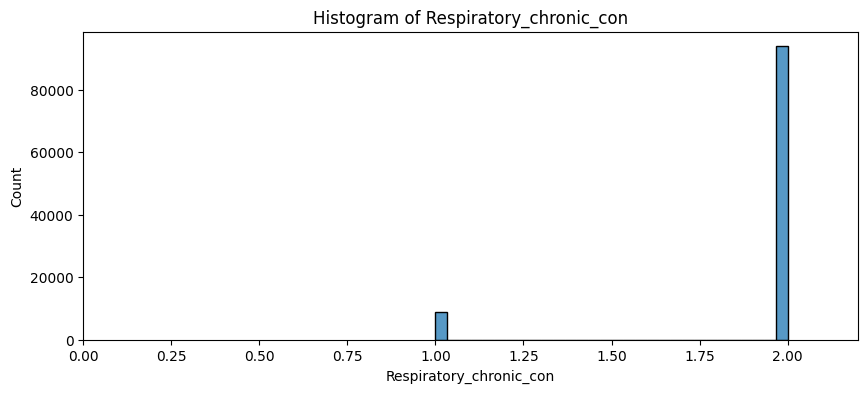

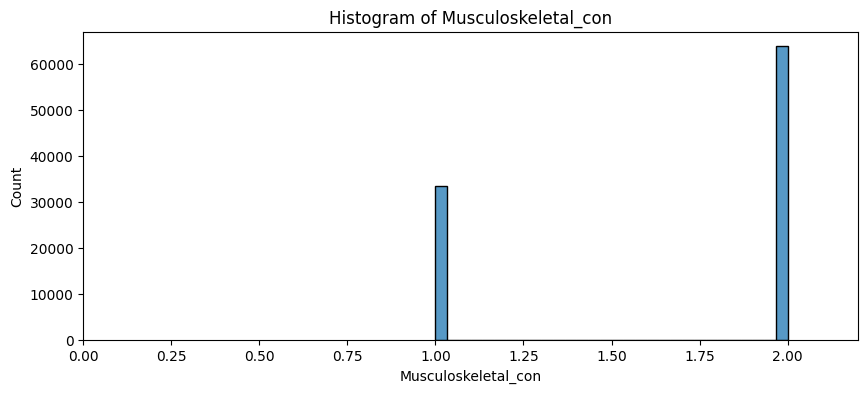

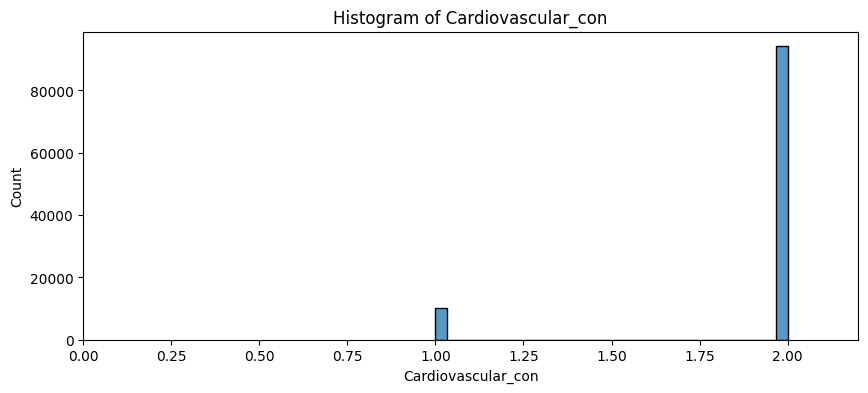

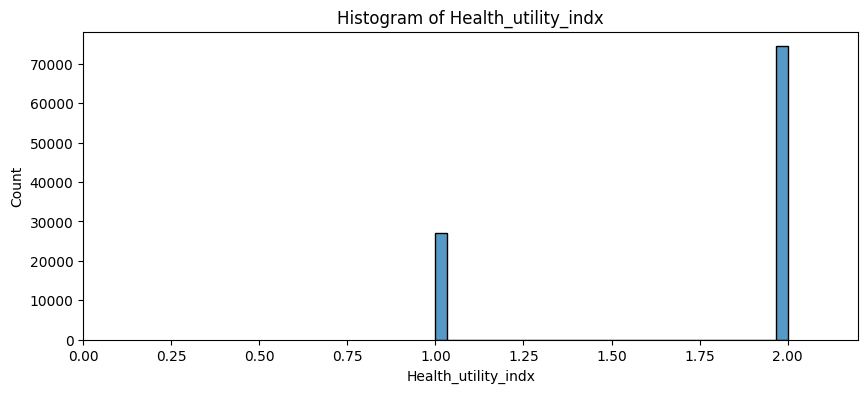

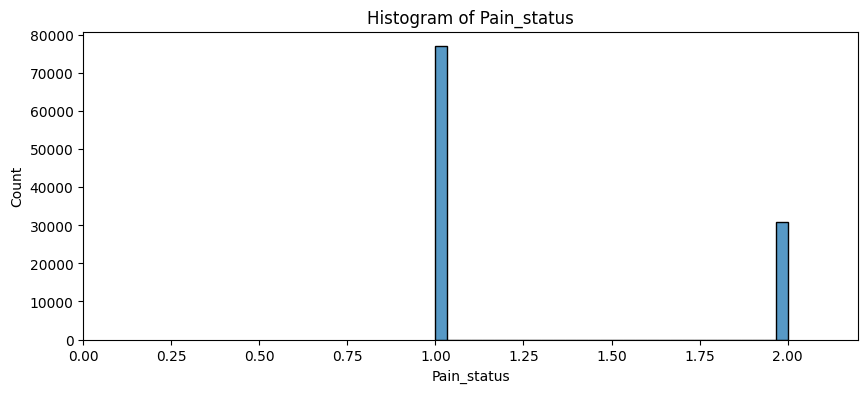

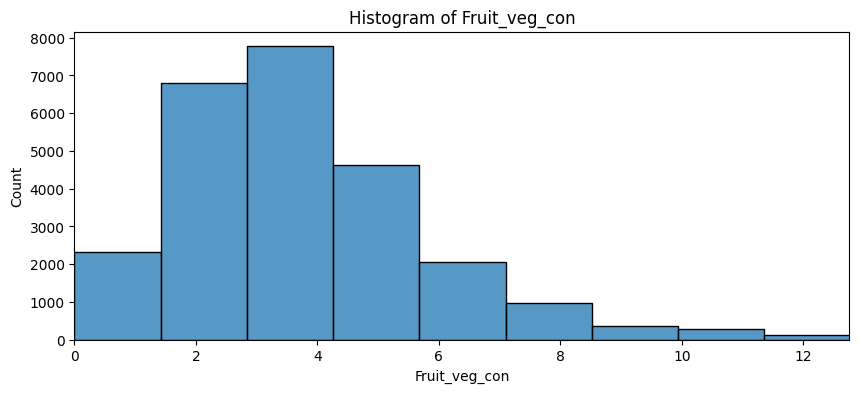

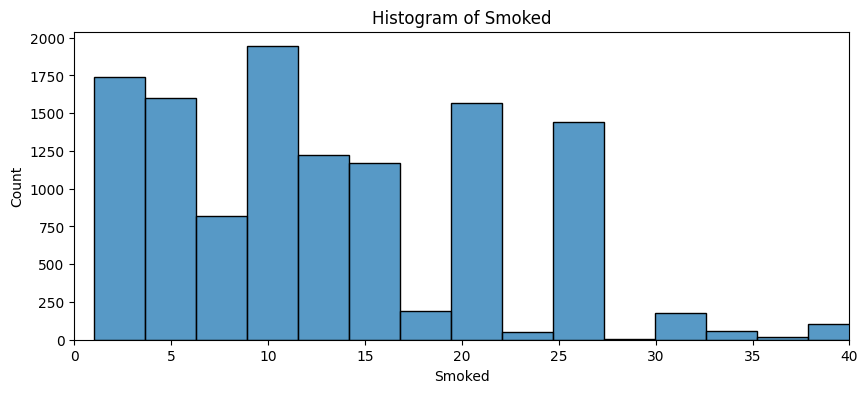

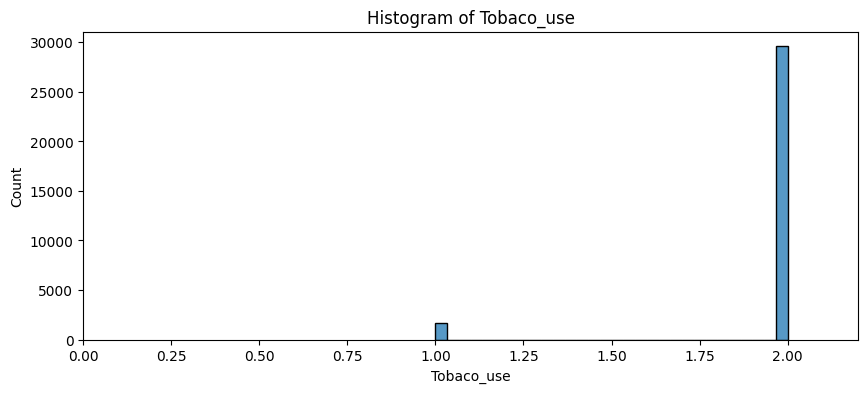

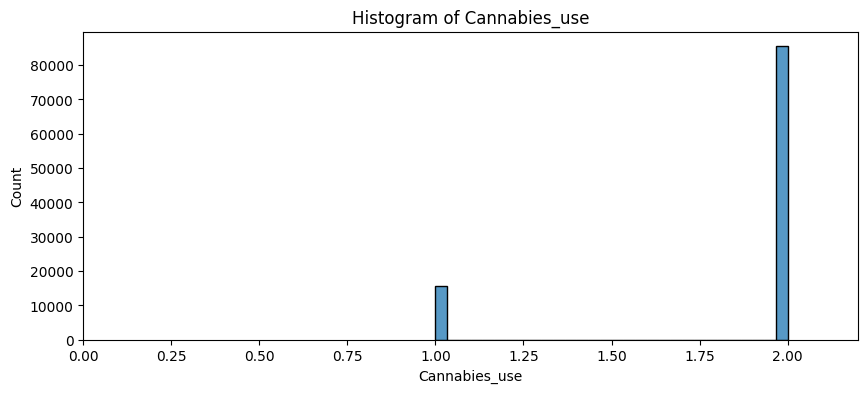

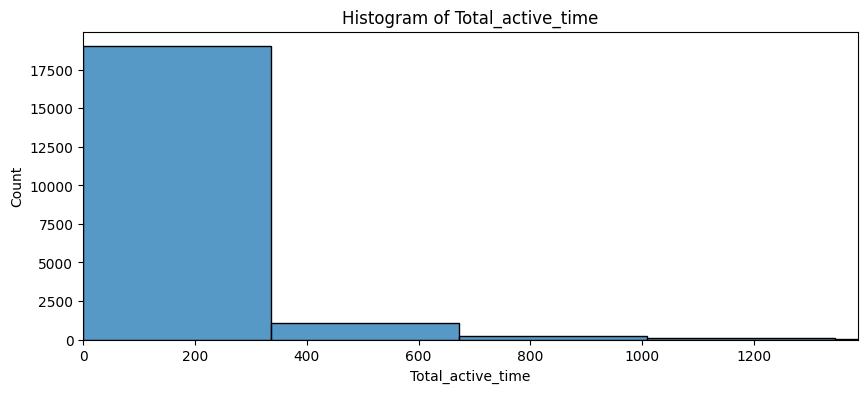

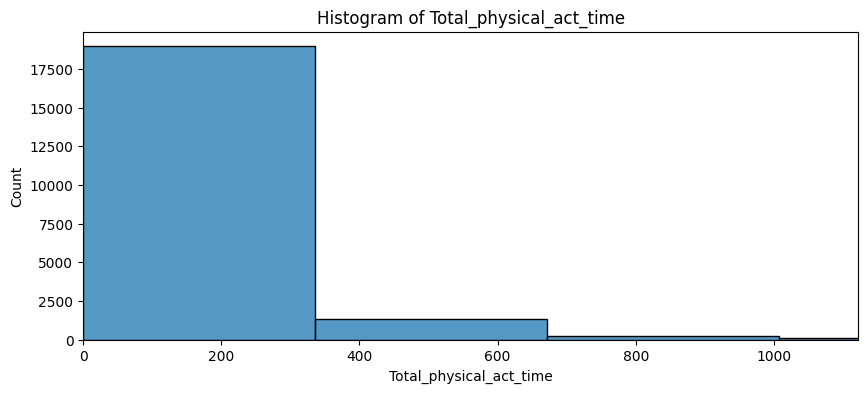

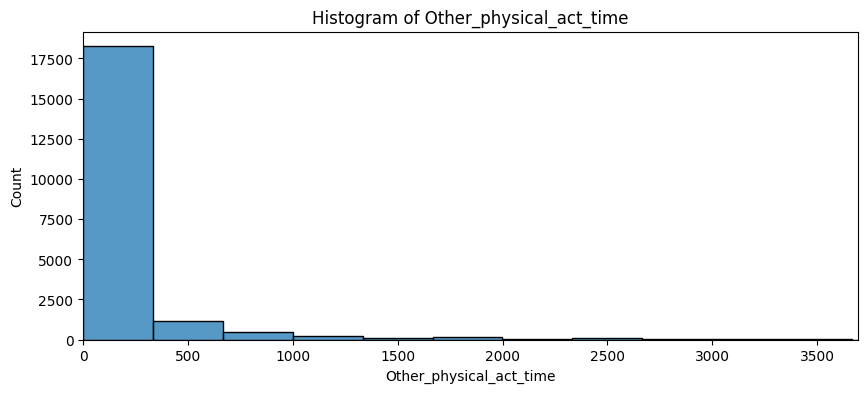

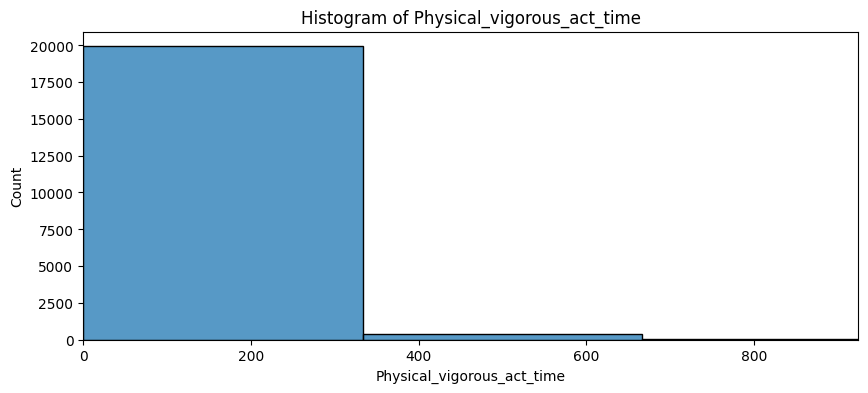

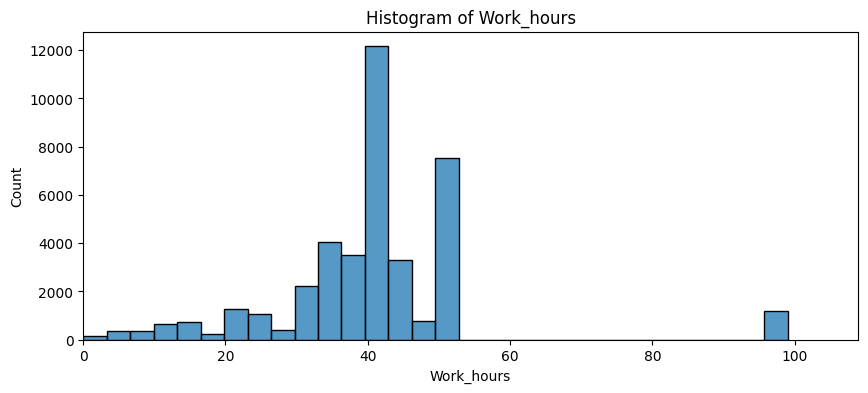

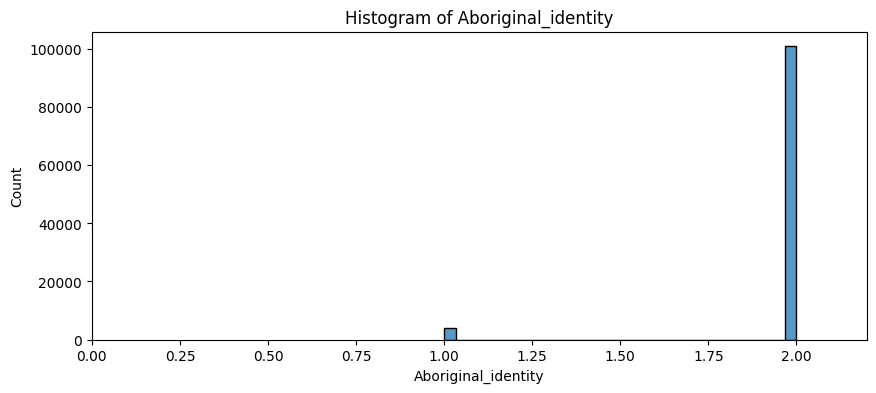

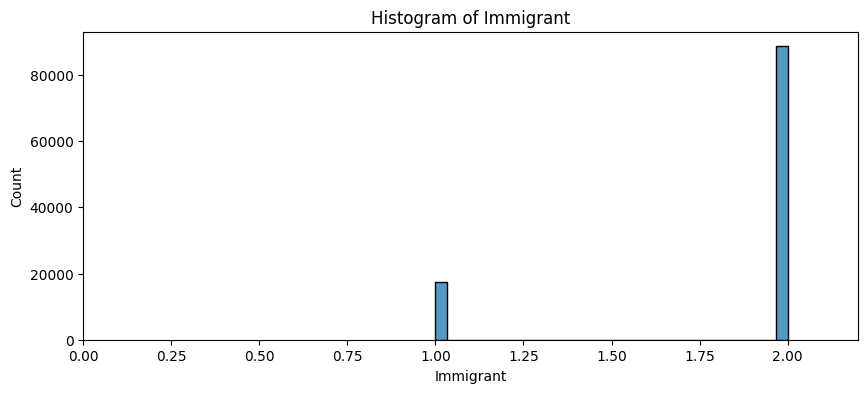

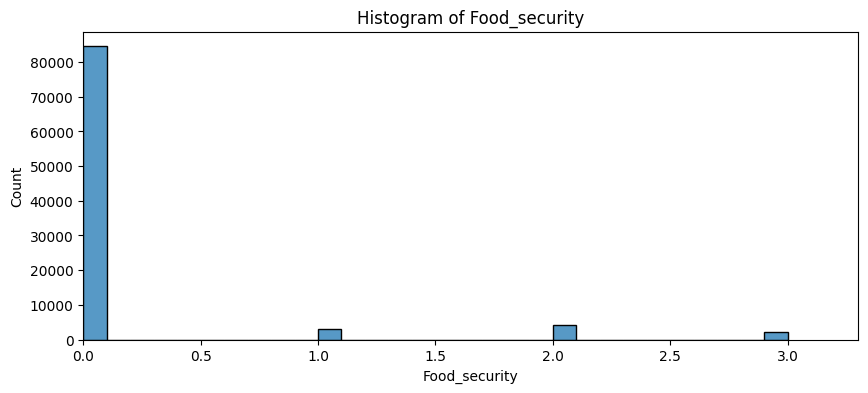

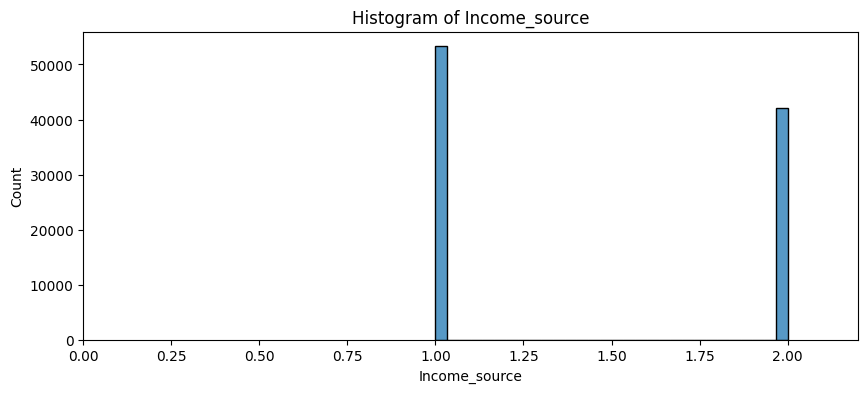

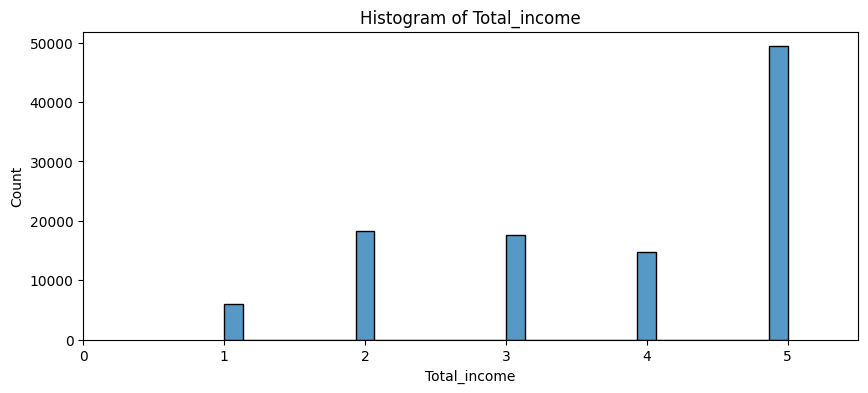

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols = df.select_dtypes(include='number').columns.tolist()

chunk_size = 10
for i in range(0, len(numeric_cols), chunk_size):
    cols_chunk = numeric_cols[i:i+chunk_size]
    for col in cols_chunk:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col].dropna(), bins=30, kde=False)

        if col == 'weekly_alcohol':
            plt.xlim(0, 40)
        elif col == 'Smoked':
            plt.xlim(0, 40)
        else:
            q99 = np.percentile(df[col].dropna(), 99)
            plt.xlim(0, q99 * 1.1)

        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
